# Tutorial of network schematas - Bio Models
The network schematas for biological relevant boolean network models

In [2]:
%matplotlib inline

In [3]:
from __future__ import division
import os
import math
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.2g}'.format
import graphviz
import cana
from cana.drawing import draw_canalizing_map_graphviz
from cana.drawing import draw_dynamics_canalization_map_graphviz
import matplotlib as mpl
import matplotlib.style
mpl.style.use('classic')
from matplotlib.text import Text
from matplotlib.patches import Circle, Rectangle, RegularPolygon
from matplotlib.collections import PatchCollection
import random
from copy import copy
mpl.rc('font', **{'size':16})
import matplotlib.pyplot as plt
from cana.datasets.bio import THALIANA, DROSOPHILA, BUDDING_YEAST
from IPython.display import display, Image, Latex, SVG, HTML
import subprocess
#
import json
import ast
# Add the line below for graphviz to work on windows
# os.environ["PATH"] += os.pathsep + "C:/Anaconda/pkgs/graphviz-2.38.0-4/Library/bin/"

SyntaxError: from __future__ imports must occur at the beginning of the file (<ipython-input-3-2543af9213c2>, line 9)

In [3]:
def multi_column_display(objs, titles=['',''], cols=2):
    html_table = "<table style='width:100%; border:0px'>{content}</table>"
    html_row = "<tr style='border:0px'>{content}</tr>"
    html_cell = "<td style='width:{width}%;vertical-align:top;border:0px'><h3>{{title}}</h3>{{content}}</td>"
    html_cell = html_cell.format(width=100/cols)

    cells = [ html_cell.format(content=obj,title=title) for obj,title in zip(objs,titles) ]
    cells += (cols - (len(objs)%cols)) * [html_cell.format(content="",title="")] # pad
    rows = [ html_row.format(content="".join(cells[i:i+cols])) for i in range(0,len(cells),cols)]
    display(HTML(html_table.format(content="".join(rows))))

In [4]:
name = 'breastcancer'
d = open('../cana/{:s}_dict.txt'.format(name), 'r').read()
d = ast.literal_eval(d)
N = cana.BooleanNetwork.from_dict(d, name=name)
foldername = name
print N

<BNetwork(Name='breastcancer', N=80, Nodes=['IGF1R_T', 'IGF1R', 'IGF1R_2', 'Fulvestrant', 'Alpelisib', 'Everolimus', 'Trametinib', 'Ipatasertib', 'Palbociclib', 'Neratinib', 'HER2', 'HER3_T', 'HER3', 'HER3_2', 'PDK1', 'mTORC2', 'SGK1_T', 'SGK1', 'PIM', 'HER2_3', 'HER2_3_2', 'RAS', 'RAS_2', 'RAS_3', 'MAPK', 'MAPK_2', 'PI3K', 'PI3K_2', 'PTEN', 'PIP3', 'PIP3_2', 'PDK1_pm', 'mTORC2_pm', 'AKT', 'p21_p27_T', 'p21_p27', 'cycE_CDK2_T', 'cycE_CDK2', 'KMT2D', 'TSC', 'PRAS40', 'mTORC1', 'FOXO3', 'FOXO3_Ub', 'BIM_T', 'BCL2_T', 'BIM', 'BAD', 'MCL1', 'EIF4F', 'S6K', 'Translation', 'ER', 'ESR1', 'ESR1_2', 'FOXA1', 'PBX1', 'ER_transcription', 'ER_transcription_2', 'MYC', 'MYC_2', 'cyclinD', 'cyclinD_2', 'BCL2', 'CDK46', 'cycD_CDK46', 'cycD_CDK46_2', 'pRb', 'pRb_2', 'pRb_3', 'E2F', 'E2F_2', 'E2F_3', 'Proliferation', 'Proliferation_2', 'Proliferation_3', 'Proliferation_4', 'Apoptosis', 'Apoptosis_2', 'Apoptosis_3'])>


## Effective Graph

In [5]:
Nsg = N.structural_graph()

In [6]:

nodes = {d['label']:i for i,d in Nsg.nodes(data=True)}
n = len(nodes)
nodes={v:k for k,v in nodes.items()}
att = {}

ctr_nodes = {i:d['label'] for i,d in Nsg.nodes(data=True) if i in [51,57,58,73,74,75,76,77,78,79]}
ALR = ctr_nodes.keys()
in1_nodes = {i:d['label'] for i,d in Nsg.nodes(data=True) if Nsg.out_degree(i)==2 and i not in ALR}
ALR.extend(in1_nodes.keys())
in2_nodes = {i:d['label'] for i,d in Nsg.nodes(data=True) if Nsg.out_degree(i)==3 and i not in ALR}
ALR.extend(in2_nodes.keys())
out_nodes = {i:d['label'] for i,d in Nsg.nodes(data=True) if i not in ALR}

n_in1 = len(in1_nodes)
n_in2 = len(in2_nodes)
n_out = len(out_nodes)
n_ctr = len(ctr_nodes)
r_ctr = 2
r_in1 = 3
r_in2 = 4
r_out = 5

ctr = max([r_in1,r_out,r_ctr])/2

for deg,(nid,label) in zip( np.linspace(0,360,n_in1,False), in1_nodes.items()):
    x, y = round(ctr + r_in1*math.cos(math.radians(deg)),2), round(ctr + r_in1*math.sin(math.radians(deg)),2)
    pos = '{:.2f},{:.2f}!'.format(x,y)
    att[nid] = {'label':label,'pos':pos,'fillcolor':'#515660'}
for deg,(nid,label) in zip( np.linspace(0,360,n_in2,False), in2_nodes.items()):
    x, y = round(ctr + r_in2*math.cos(math.radians(deg)),2), round(ctr + r_in2*math.sin(math.radians(deg)),2)
    pos = '{:.2f},{:.2f}!'.format(x,y)
    att[nid] = {'label':label,'pos':pos,'fillcolor':'#515660'}
for deg,(nid,label) in zip( np.linspace(0,360,n_out, False), out_nodes.items()):
    x, y = round(ctr + r_out*math.cos(math.radians(deg)),2), round(ctr + r_out*math.sin(math.radians(deg)),2)
    pos = '{:.2f},{:.2f}!'.format(x,y)
    att[nid] = {'label':label,'pos':pos,'fillcolor':'#515660'}
for deg,(nid,label) in zip( np.linspace(0,360,n_ctr,False), ctr_nodes.items()):
    x, y = round(ctr + r_ctr*math.cos(math.radians(deg)),2), round(ctr + r_ctr*math.sin(math.radians(deg)),2)
    pos = '{:.2f},{:.2f}!'.format(x,y)
    att[nid] = {'label':label,'pos':pos,'fillcolor':'red', 'width':'.99', 'shape':'oval'}

Nodes: 80 | Edges: 229


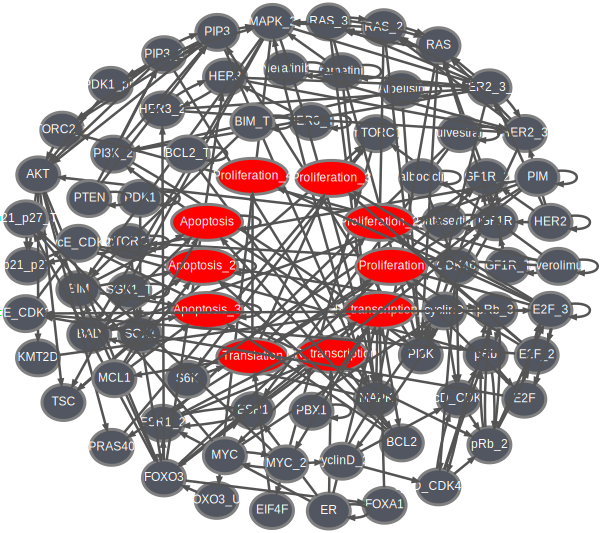

1

In [7]:
# Draw the Structural Graph
S = graphviz.Digraph(name='Structural Graph', engine='neato')
S.attr('graph', concentrate='false', simplify='false', overlap='false',splines='false')
S.attr('node', shape='oval', fixedsize='true', width='.60', color='gray', style='filled', fillcolor='#515660', penwidth='3', 
       fontname='Helvetica', fontcolor='white',fontsize='12')
S.attr('edge', arrowhead='normal', arrowsize='.5', color='#545454')

for nid,d in Nsg.nodes(data=True):
    if nid not in att:
        continue
    natt = att[nid]
    S.node(name=str(nid), **natt)

max_penwidth = 2.5
for s,t,d in Nsg.edges(data=True):
    weight = '%d' % (d['weight']*100)
    penwidth_scaled = '%.2f' % ( (d['weight']/1)*max_penwidth )
    S.edge(str(s),str(t), weight=weight, penwidth=penwidth_scaled, )
print 'Nodes: %d | Edges: %d' % (len(Nsg.nodes()) , len(Nsg.edges()) )
# Display
display(SVG(S.pipe(format='svg')),metadata={'isolated':True})
# Export
S._format = 'svg'
efile = u"%s/../experiments/2017 - BioModels/%s/graphs/SG" % (os.getcwd(),foldername)
S.render(efile, cleanup=True)
subprocess.call("inkscape -z '%s.svg' -d 300 -e '%s.png'" % (efile,efile) , shell=True)

In [8]:
# Calculate Effective Graph
threshold = 0.00
Neg = N.effective_graph(mode='input',bound='upper', threshold=threshold)

In [9]:
#display only state variables, rather than each node state
#create condensed set of nodes: {key original node, value supernode label}
super_node_map={0:[0],1:[1],2:[1],3:[2],4:[3],5:[4],6:[5],7:[6],8:[7],9:[8],
             10:[9],11:[10],12:[11],13:[11],14:[12],15:[13],16:[14],17:[15],18:[16],19:[17],
             20:[17],21:[18],22:[18],23:[18],24:[19],25:[19],26:[20],27:[20],28:[21],29:[22],
             30:[22],31:[23],32:[24],33:[25],34:[26],35:[27],36:[28],37:[29],38:[30],39:[31],
             40:[32],41:[33],42:[34],43:[35],44:[36],45:[37],46:[38],47:[39],48:[40],49:[41],
             50:[42],51:[43],52:[44],53:[45],54:[45],55:[46],56:[47],57:[48],58:[48],59:[49],
             60:[49],61:[50],62:[50],63:[51],64:[52],65:[53],66:[53],67:[54],68:[54],69:[54],
             70:[55],71:[55],72:[55],73:[56],74:[56],75:[56],76:[56],77:[57],78:[57],79:[57]}
#reverse_node_map = {node[0]:key for key,node in super_node_map.items()}

ls = super_node_map.items()
ls.reverse() #reverse list so that we keep the first name and overwrite the multi-state variants
att = {node[0]:{'label':nodes[key]} for key,node in ls}

#create condensed set of edges, creates multigraph
edges=[(super_node_map[edge[0]][0],super_node_map[edge[1]][0],edge[2]) for edge in Neg.edges(data=True)]
#filter out multiple edges and average weights
all_edges={edge[0]:{} for edge in edges}
for edge in edges: #calculate average in place
    all_edges[edge[0]].setdefault(edge[1],{'weight':0,'number':0})
    all_edges[edge[0]][edge[1]]['number']+=1
    all_edges[edge[0]][edge[1]]['weight']+= \
    (edge[2]['weight']-all_edges[edge[0]][edge[1]]['weight'])/all_edges[edge[0]][edge[1]]['number']
averaged_edges=[(key1,key2,{'weight':all_edges[key1][key2]['weight']}) for key1 in all_edges for key2 in all_edges[key1]]
#print Neg.edges(data=True)
print  len(edges),len(averaged_edges)

229 124


In [10]:
#further condense to variables of interest, assumes ER is ESR1
fig3_node_map={0:[0],1:[0],2:[0],3:[1],4:[2],5:[3],6:[4],7:[5],8:[6],9:[7],
             10:[8],11:[8],12:[8],13:[8],14:[9],15:[10],16:[11],17:[11],18:[12],19:[8],
             20:[8],21:[13],22:[13],23:[13],24:[14],25:[14],26:[15],27:[15],28:[16],29:[17],
             30:[17],31:[18],32:[19],33:[20],34:[21],35:[21],36:[22],37:[22],38:[23],39:[24],
             40:[25],41:[26],42:[27],43:[27],44:[28],45:[40],46:[28],47:[29],48:[30],49:[31],
             50:[32],51:[33],52:[34],53:[34],54:[34],55:[35],56:[36],57:[37],58:[37],59:[38],
             60:[38],61:[39],62:[39],63:[40],64:[41],65:[42],66:[42],67:[43],68:[43],69:[43],
             70:[44],71:[44],72:[44],73:[45],74:[45],75:[45],76:[45],77:[46],78:[46],79:[46]}

ls = fig3_node_map.items()
ls.reverse() #reverse list so that we keep the first name and overwrite the multi-state variants
att = {node[0]:{'label':nodes[key]} for key,node in ls}
#manually fix labels to match figure
att[0]['label']='IGF1R'
att[8]['label']='HER2/HER3'
att[11]['label']='SGK1'
att[21]['label']='p21/p27'
att[22]['label']='cycE/CDK2'
att[28]['label']='BIM'
att[34]['label']='ESR1'
att[40]['label']='BCL2'

#create condensed set of edges, creates multigraph
fig3_multi_edges,fig3_averaged_edges=[],[]
fig3_multi_edges=[(fig3_node_map[edge[0]][0],fig3_node_map[edge[1]][0],edge[2]) for edge in Neg.edges(data=True)]
#filter out multiple edges and average weights
fig3_all_edges={edge[0]:{} for edge in fig3_multi_edges}
for edge in fig3_multi_edges: #calculate average in place
    fig3_all_edges[edge[0]].setdefault(edge[1],{'weight':0,'number':0})
    fig3_all_edges[edge[0]][edge[1]]['number']+=1
    fig3_all_edges[edge[0]][edge[1]]['weight']+= \
    (edge[2]['weight']-fig3_all_edges[edge[0]][edge[1]]['weight'])/fig3_all_edges[edge[0]][edge[1]]['number']
fig3_averaged_edges=[(key1,key2,{'weight':fig3_all_edges[key1][key2]['weight']}) \
                     for key1 in fig3_all_edges for key2 in fig3_all_edges[key1]]
print  len(fig3_multi_edges),len(fig3_averaged_edges)
print att

229 110
{0: {'label': 'IGF1R'}, 1: {'label': 'Fulvestrant'}, 2: {'label': 'Alpelisib'}, 3: {'label': 'Everolimus'}, 4: {'label': 'Trametinib'}, 5: {'label': 'Ipatasertib'}, 6: {'label': 'Palbociclib'}, 7: {'label': 'Neratinib'}, 8: {'label': 'HER2/HER3'}, 9: {'label': 'PDK1'}, 10: {'label': 'mTORC2'}, 11: {'label': 'SGK1'}, 12: {'label': 'PIM'}, 13: {'label': 'RAS'}, 14: {'label': 'MAPK'}, 15: {'label': 'PI3K'}, 16: {'label': 'PTEN'}, 17: {'label': 'PIP3'}, 18: {'label': 'PDK1_pm'}, 19: {'label': 'mTORC2_pm'}, 20: {'label': 'AKT'}, 21: {'label': 'p21/p27'}, 22: {'label': 'cycE/CDK2'}, 23: {'label': 'KMT2D'}, 24: {'label': 'TSC'}, 25: {'label': 'PRAS40'}, 26: {'label': 'mTORC1'}, 27: {'label': 'FOXO3'}, 28: {'label': 'BIM'}, 29: {'label': 'BAD'}, 30: {'label': 'MCL1'}, 31: {'label': 'EIF4F'}, 32: {'label': 'S6K'}, 33: {'label': 'Translation'}, 34: {'label': 'ESR1'}, 35: {'label': 'FOXA1'}, 36: {'label': 'PBX1'}, 37: {'label': 'ER_transcription'}, 38: {'label': 'MYC'}, 39: {'label': 'cyc

In [314]:
#alternative to show original edges, rather than effective weights (every edge weighted equally)
for edge in fig3_multi_edges: 
    edge[2]['weight']=1
for edge in fig3_averaged_edges: 
    edge[2]['weight']=1

In [11]:
#calculate positions for att, try 9x13 grid
x,y = np.linspace(0,600,9,dtype=int), np.linspace(600,0,14,dtype=int)

#enumerate all 47 nodes
att[0]['pos'] = '{:.2f},{:.2f}!'.format(x[2]/72,y[1]/72) #IGF1R    #{'x':x[5],'y':y[0],'fillcolor':'#4f6fb0'}
att[1]['pos'] = '{:.2f},{:.2f}!'.format(x[6]/72,y[3]/72) #Fulvestrant
att[2]['pos'] = '{:.2f},{:.2f}!'.format(x[5]/72,y[3]/72) #Alpelisib
att[3]['pos'] = '{:.2f},{:.2f}!'.format(x[5]/72,y[4]/72) #Everolimus
att[4]['pos'] = '{:.2f},{:.2f}!'.format(x[0]/72,y[2]/72) #Trametinib
att[5]['pos'] = '{:.2f},{:.2f}!'.format(x[6]/72,y[4]/72) #Ipatasertib
att[6]['pos'] = '{:.2f},{:.2f}!'.format(x[7]/72,y[7]/72) #Palbociclib
att[7]['pos'] = '{:.2f},{:.2f}!'.format(x[0]/72,y[0]/72) #Neratinib
att[8]['pos'] = '{:.2f},{:.2f}!'.format(x[1]/72,y[1]/72) #HER2/HER3    
att[9]['pos'] = '{:.2f},{:.2f}!'.format(x[0]/72,y[5]/72) #PDK1
att[10]['pos'] = '{:.2f},{:.2f}!'.format(x[1]/72,y[5]/72) #mTORC2
att[11]['pos'] = '{:.2f},{:.2f}!'.format(x[0]/72,y[6]/72) #SGK1
att[12]['pos'] = '{:.2f},{:.2f}!'.format(x[2]/72,y[5]/72) #PIM
att[13]['pos'] = '{:.2f},{:.2f}!'.format(x[1]/72,y[3]/72) #RAS
att[14]['pos'] = '{:.2f},{:.2f}!'.format(x[0]/72,y[3]/72) #MAPK
att[15]['pos'] = '{:.2f},{:.2f}!'.format(x[2]/72,y[3]/72) #PI3K
att[16]['pos'] = '{:.2f},{:.2f}!'.format(x[4]/72,y[2]/72) #PTEN    
att[17]['pos'] = '{:.2f},{:.2f}!'.format(x[4]/72,y[5]/72) #PIP3
att[18]['pos'] = '{:.2f},{:.2f}!'.format(x[3]/72,y[6]/72) #PDK1_pm
att[19]['pos'] = '{:.2f},{:.2f}!'.format(x[5]/72,y[6]/72) #mTORC2_pm
att[20]['pos'] = '{:.2f},{:.2f}!'.format(x[4]/72,y[7]/72) #AKT
att[21]['pos'] = '{:.2f},{:.2f}!'.format(x[6]/72,y[8]/72) #p21/p27
att[22]['pos'] = '{:.2f},{:.2f}!'.format(x[6]/72,y[9]/72) #cycE/CDK2
att[23]['pos'] = '{:.2f},{:.2f}!'.format(x[6]/72,y[6]/72) #KMT2D
att[24]['pos'] = '{:.2f},{:.2f}!'.format(x[4]/72,y[8]/72) #TSC    
att[25]['pos'] = '{:.2f},{:.2f}!'.format(x[3]/72,y[9]/72) #PRAS40
att[26]['pos'] = '{:.2f},{:.2f}!'.format(x[4]/72,y[9]/72) #mTORC1
att[27]['pos'] = '{:.2f},{:.2f}!'.format(x[0]/72,y[9]/72) #FOXO3
att[28]['pos'] = '{:.2f},{:.2f}!'.format(x[0]/72,y[11]/72) #BIM
att[29]['pos'] = '{:.2f},{:.2f}!'.format(x[1]/72,y[11]/72) #BAD
att[30]['pos'] = '{:.2f},{:.2f}!'.format(x[3]/72,y[11]/72) #MCL1
att[31]['pos'] = '{:.2f},{:.2f}!'.format(x[4]/72,y[10]/72) #EIF4F
att[32]['pos'] = '{:.2f},{:.2f}!'.format(x[5]/72,y[10]/72) #S6K    
att[33]['pos'] = '{:.2f},{:.2f}!'.format(x[5]/72,y[11]/72) #Translation
att[34]['pos'] = '{:.2f},{:.2f}!'.format(x[6]/72,y[1]/72) #ESR1
att[35]['pos'] = '{:.2f},{:.2f}!'.format(x[7]/72,y[1]/72) #FOXA1
att[36]['pos'] = '{:.2f},{:.2f}!'.format(x[8]/72,y[1]/72) #PBX1
att[37]['pos'] = '{:.2f},{:.2f}!'.format(x[8]/72,y[4]/72) #ER_transcription
att[38]['pos'] = '{:.2f},{:.2f}!'.format(x[8]/72,y[6]/72) #MYC
att[39]['pos'] = '{:.2f},{:.2f}!'.format(x[8]/72,y[8]/72) #CyclinD
att[40]['pos'] = '{:.2f},{:.2f}!'.format(x[2]/72,y[11]/72) #BCL2   
att[41]['pos'] = '{:.2f},{:.2f}!'.format(x[7]/72,y[8]/72) #CDK46
att[42]['pos'] = '{:.2f},{:.2f}!'.format(x[8]/72,y[9]/72) #CycD_CDK46
att[43]['pos'] = '{:.2f},{:.2f}!'.format(x[7]/72,y[10]/72) #pRb
att[44]['pos'] = '{:.2f},{:.2f}!'.format(x[7]/72,y[11]/72) #E2F
att[45]['pos'] = '{:.2f},{:.2f}!'.format(x[6]/72,y[13]/72) #Proliferation
att[46]['pos'] = '{:.2f},{:.2f}!'.format(x[1]/72,y[13]/72) #Apoptosis

#print att

In [12]:
#assign each node to a pathway
RTK_path=[0,8]
PI3K_path=[15,16,17]
MAPK_path=[13,14]
AKT_path=[9,10,11,12,18,19,20,27]
mTORC1_path=[24,25,26,31,32,33]
ER_path=[23,34,35,36,37,38]
apop_path=[28,29,30,40,46]
prol_path=[21,22,39,41,42,43,44,45]
drug_path=[1,2,3,4,5,6,7]
for node in att:
    if node in RTK_path: att[node]['fillcolor']='#fb8072'
    elif node in PI3K_path: att[node]['fillcolor']='#80b1d3'
    elif node in MAPK_path: att[node]['fillcolor']='#ffffb3'
    elif node in AKT_path: att[node]['fillcolor']='#8dd3c7'
    elif node in mTORC1_path: att[node]['fillcolor']='#fdb462'
    elif node in ER_path: att[node]['fillcolor']='#d9d9d9'
    elif node in apop_path: att[node]['fillcolor']='#b3de69'
    elif node in prol_path: att[node]['fillcolor']='#bebada'
    elif node in drug_path: att[node]['fillcolor']='#bc80bd'
    else: att[node]['fillcolor']='grey'

Nodes: 80 | Edges: 229


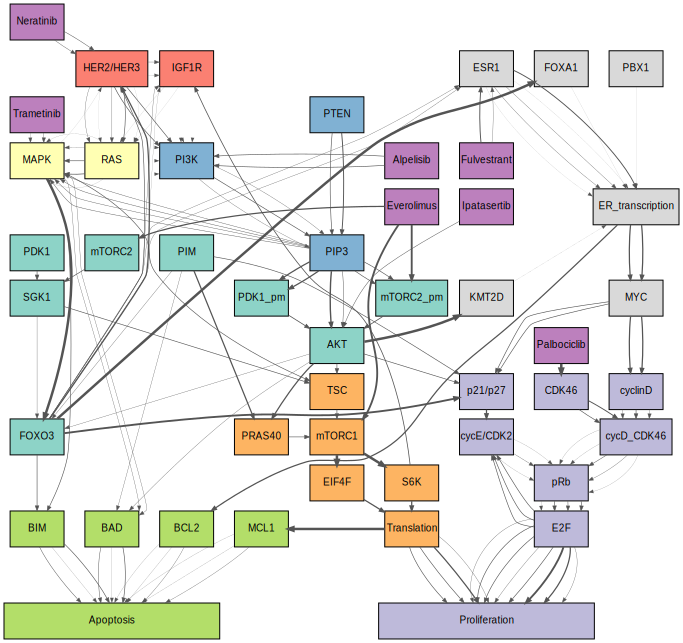

1

In [13]:
# Draw the Effective Graph
E = graphviz.Digraph(name='Effective Graph', engine='neato')
E.attr('graph', concentrate='false', simplify='false', splines='true')
E.attr('node', shape='rectangle', fixedsize='true', width='.75', color='black', style='filled', penwidth='1', #fixedsize='true', width='.75'
       fontname='Helvetica', fontcolor='black',fontsize='10')
E.attr('edge', arrowhead='normal', arrowsize='.5', color='#545454')

#specify overrides to fixed size for the multigraph (for the averaged graph graphviz can calculate each width)
att[8]['width']='1.0' #HER2/HER3
att[19]['width']='1.0' #mTORC2_pm
att[37]['width']='1.2' #ER_transcription
att[42]['width']='1.0' #CycD_CDK46
att[45]['width']='3.0' #proliferation
att[46]['width']='3.0' #apoptosis

#for nid,d in Nsg.nodes(data=True):
for nid in att:
    natt = att[nid]
    E.node(name=str(nid), **natt)

max_penwidth = 2.5
#for s,t,d in Neg.edges(data=True):
for s,t,d in fig3_multi_edges: #use edges for multigraph or averaged_edges for regular graph (or fig3_multi_edges/fig3_averaged_edges)
    if s==t: continue #include this line to get rid of self-loops
    weight = '%d' % (d['weight']*100)
    penwidth_scaled = '%.2f' % ( (d['weight']/1)*max_penwidth )
    E.edge(str(s),str(t), weight=weight, penwidth=penwidth_scaled)
    
print 'Nodes: %d | Edges: %d' % (len(Neg.nodes()) , len(Neg.edges()) )
# Display
display(SVG(E.pipe(format='svg')),metadata={'isolated':True})
# Export
E._format = 'svg'
efile = u'%s/../experiments/2017 - BioModels/%s/graphs/EG' % (os.getcwd(),foldername)
E.render(efile, cleanup=True)
subprocess.call("inkscape -z '%s.svg' -d 300 -e '%s.png'" % (efile,efile) , shell=True)

In [14]:
bound = 'upper'
print N.nodes[13]
print N.nodes[13].schemata_look_up_table(type="pi")
df = pd.DataFrame({
        'node':[n.name for n in N.nodes],
        'k':[n.k for n in N.nodes],
        'k_r':[n.input_redundancy(mode='node',bound=bound,norm=False) for n in N.nodes],
        'k_e':[n.effective_connectivity(mode='node',bound=bound,norm=False) for n in N.nodes],
        'k_s':[n.input_symmetry(mode='node',bound=bound,norm=False) for n in N.nodes],
        'k_r*':[n.input_redundancy(mode='node',bound=bound,norm=True) for n in N.nodes],
        'k_e*':[n.effective_connectivity(mode='node',bound=bound,norm=True) for n in N.nodes],
        'k_s*':[n.input_symmetry(mode='node',bound=bound,norm=True) for n in N.nodes],
        'k_e(out-d)':[Neg.out_degree()[n] for n in Neg.out_degree()],
        'k_e(out-s)':[Neg.out_degree(weight='weight')[n] for n in Neg.out_degree(weight='weight')],
    }).set_index('node')
df = df[['k','k_r','k_e','k_s','k_r*','k_e*','k_s*','k_e(out-d)','k_e(out-s)']]
print df
efile = u'%s/../experiments/2017 - BioModels/%s/nodes.csv' % (os.getcwd(),foldername)
df.to_csv(efile, encoding='utf-8')

<BNode(name='HER3_2', k=2, inputs=[HER3,FOXO3], state=0, outputs='[0,0,0,1]' constant=False)>
  In:  Out:
0  0#     0
1  #0     0
2  11     1
                    k  k_r  k_e  k_s  k_r*  k_e*  k_s*  k_e(out-d)  k_e(out-s)
node                                                                          
IGF1R_T             1    0    1    0     0     1     0           3         1.6
IGF1R               4  2.6  1.4  1.4  0.64  0.36  0.36           3        0.35
IGF1R_2             5  3.6  1.4  3.1  0.71  0.29  0.61           3        0.41
Fulvestrant         1    0    1    0     0     1     0           3         1.5
Alpelisib           1    0    1    0     0     1     0           3         1.5
Everolimus          1    0    1    0     0     1     0           4           3
Trametinib          1    0    1    0     0     1     0           3         1.2
Ipatasertib         1    0    1    0     0     1     0           2         1.2
Palbociclib         1    0    1    0     0     1     0           2  

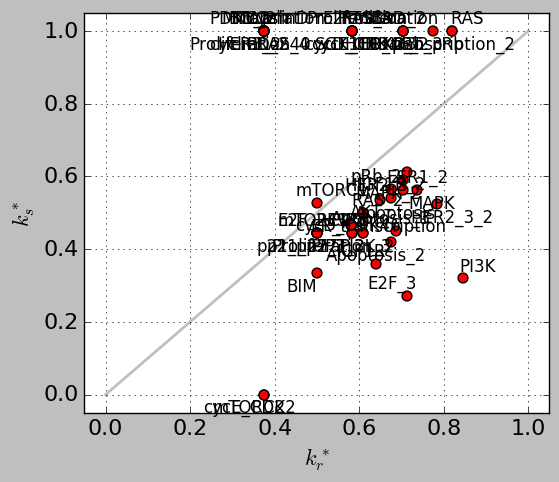

In [15]:
fig, ax = plt.subplots(1,1,figsize=(6,5), sharex=True, sharey=True)
dfp = df.loc[ (df['k']>1) , :]
ax.scatter(dfp['k_r*'],dfp['k_s*'], s=50, c='red', marker='o', zorder=2)
lx,ly = [],[]
quadrants = [-0.035,0.035]
for name, dfp_ in dfp.iterrows():
    x,y = dfp_['k_r*']+random.choice(quadrants) , dfp_['k_s*']+random.choice(quadrants)
    ax.annotate(name, (x,y),fontsize=12, va='center', ha='center')
    lx.append(x); ly.append(y)
ax.plot((0,1),(0,1),'black', lw=2,alpha=0.25, zorder=1)
ax.grid(True)
ax.set_xlim(-0.05,1.05)
ax.set_ylim(-0.05,1.05)
ax.set_xlabel('$k_r^*$')
ax.set_ylabel('$k_s^*$')
#plt.savefig('../experiments/2017 - BioModels/%s/plots/k_sn_vs_k_rn.pdf' % (foldername), dpi=150)

In [347]:
#df = df.loc[ (df['k']>1) , :]
#print df.sort_values('k',ascending=False).to_latex()
"""
multi_column_display([
        df[['k']].sort_values('k',ascending=False).to_html(),
        df[['k_r']].sort_values('k_r',ascending=False).to_html(),
        df[['k_e']].sort_values('k_e',ascending=False).to_html(),
        df[['k_s']].sort_values('k_s',ascending=False).to_html(),
        df[['k_r*']].sort_values('k_r*',ascending=False).to_html(),
        df[['k_e*']].sort_values('k_e*',ascending=False).to_html(),
        df[['k_s*']].sort_values('k_s*',ascending=False).to_html(),
        df[['k_e(out-d)']].sort_values('k_e(out-d)',ascending=False).to_html(),
        df[['k_e(out-s)']].sort_values('k_e(out-s)',ascending=False).to_html()
    ],['k','k_r','k_e','k_s','k_r*','k_e*','k_s*','k_e(out-d)','k_e(out-s)'],7 )
"""

"\nmulti_column_display([\n        df[['k']].sort_values('k',ascending=False).to_html(),\n        df[['k_r']].sort_values('k_r',ascending=False).to_html(),\n        df[['k_e']].sort_values('k_e',ascending=False).to_html(),\n        df[['k_s']].sort_values('k_s',ascending=False).to_html(),\n        df[['k_r*']].sort_values('k_r*',ascending=False).to_html(),\n        df[['k_e*']].sort_values('k_e*',ascending=False).to_html(),\n        df[['k_s*']].sort_values('k_s*',ascending=False).to_html(),\n        df[['k_e(out-d)']].sort_values('k_e(out-d)',ascending=False).to_html(),\n        df[['k_e(out-s)']].sort_values('k_e(out-s)',ascending=False).to_html()\n    ],['k','k_r','k_e','k_s','k_r*','k_e*','k_s*','k_e(out-d)','k_e(out-s)'],7 )\n"

Inputs: ['IGF1R_T']
CM: IGF1R_T


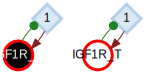

Inputs: ['IGF1R_T', 'IGF1R_2', 'HER2', 'FOXO3']
CM: IGF1R


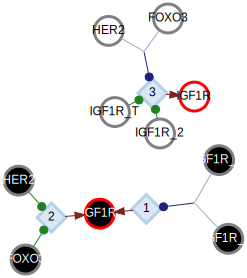

Inputs: ['IGF1R_T', 'IGF1R', 'HER2', 'FOXO3', 'S6K']
CM: IGF1R_2


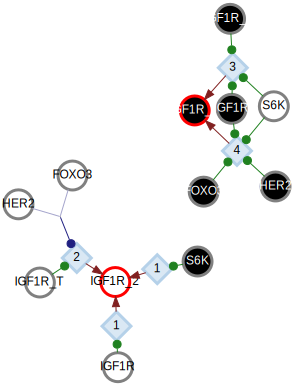

Inputs: ['Fulvestrant']
CM: Fulvestrant


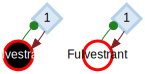

Inputs: ['Alpelisib']
CM: Alpelisib


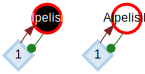

Inputs: ['Everolimus']
CM: Everolimus


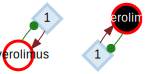

Inputs: ['Trametinib']
CM: Trametinib


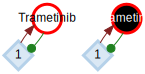

Inputs: ['Ipatasertib']
CM: Ipatasertib


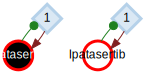

Inputs: ['Palbociclib']
CM: Palbociclib


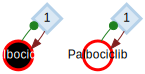

Inputs: ['Neratinib']
CM: Neratinib


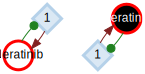

Inputs: ['HER2']
CM: HER2


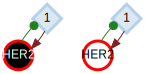

Inputs: ['HER3_T']
CM: HER3_T


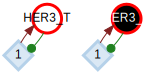

Inputs: ['HER3_T', 'HER3_2', 'FOXO3']
CM: HER3


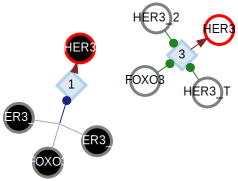

Inputs: ['HER3', 'FOXO3']
CM: HER3_2


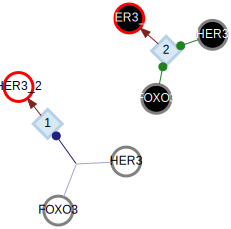

Inputs: ['PDK1']
CM: PDK1


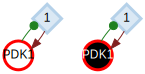

Inputs: ['Everolimus', 'mTORC2']
CM: mTORC2


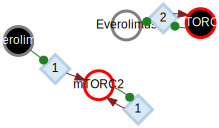

Inputs: ['SGK1_T']
CM: SGK1_T


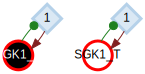

Inputs: ['PDK1', 'mTORC2', 'SGK1_T']
CM: SGK1


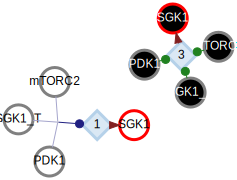

Inputs: ['PIM']
CM: PIM


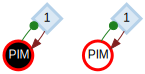

Inputs: ['Neratinib', 'HER2', 'HER3', 'HER3_2', 'HER2_3_2']
CM: HER2_3


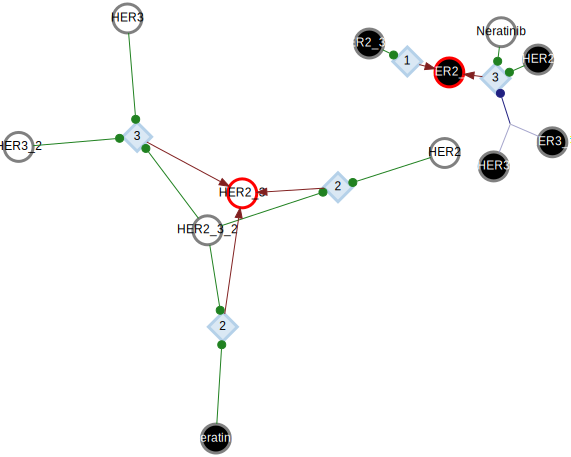

Inputs: ['Neratinib', 'HER2', 'HER3', 'HER3_2', 'HER2_3', 'MAPK_2']
CM: HER2_3_2


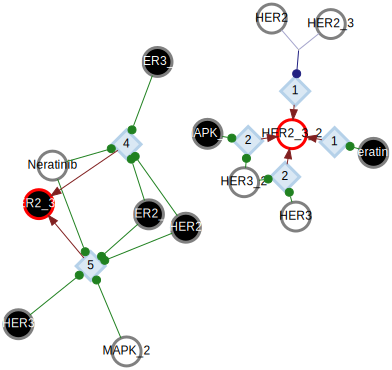

Inputs: ['IGF1R', 'IGF1R_2', 'HER2_3', 'HER2_3_2', 'RAS_2', 'RAS_3']
CM: RAS


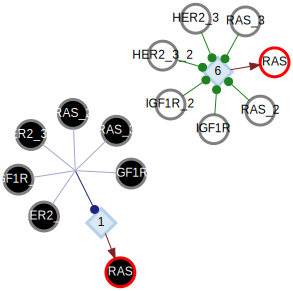

Inputs: ['HER2_3', 'HER2_3_2', 'RAS', 'RAS_3']
CM: RAS_2


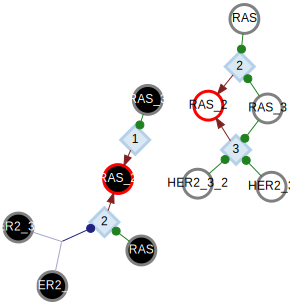

Inputs: ['HER2_3_2', 'RAS', 'RAS_2']
CM: RAS_3


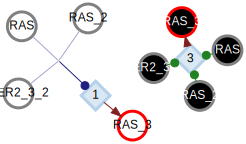

Inputs: ['Trametinib', 'RAS', 'RAS_2', 'RAS_3', 'MAPK_2', 'PIP3', 'PIP3_2']
CM: MAPK


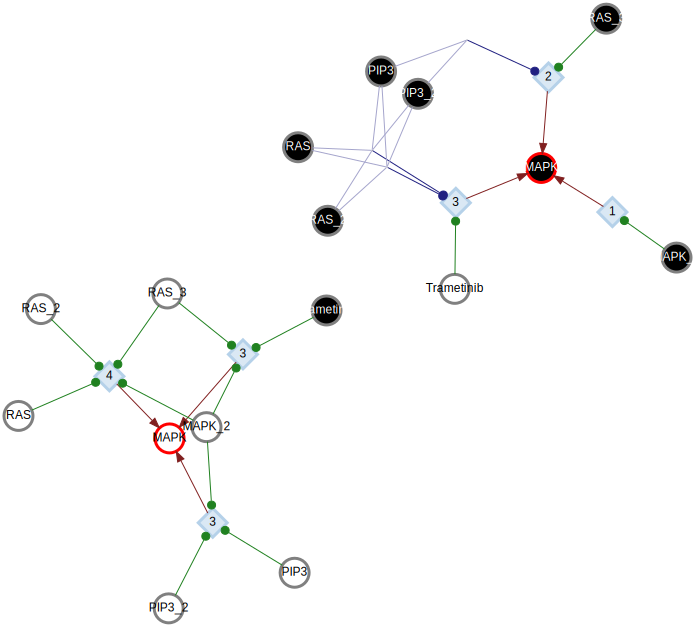

Inputs: ['Trametinib', 'RAS_2', 'RAS_3', 'MAPK', 'PIP3', 'PIP3_2']
CM: MAPK_2


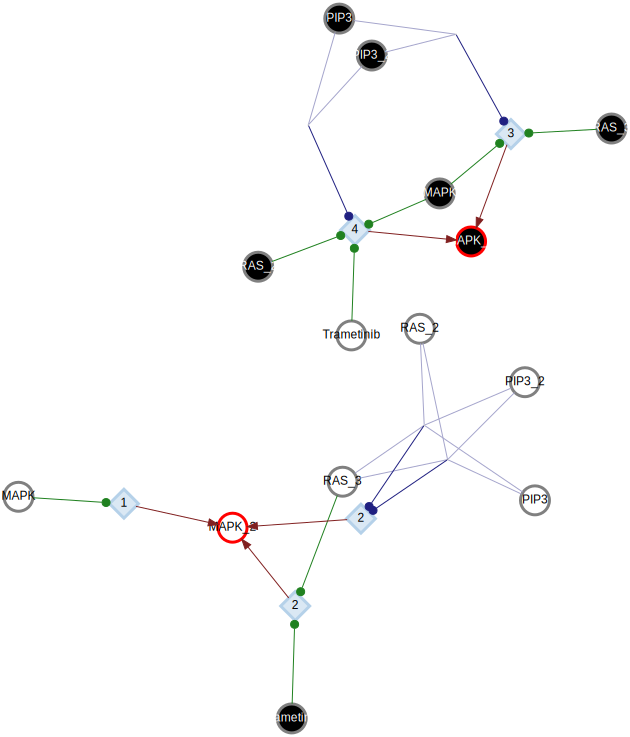

Inputs: ['IGF1R', 'IGF1R_2', 'Alpelisib', 'HER2_3', 'HER2_3_2', 'RAS', 'RAS_2', 'RAS_3', 'PI3K_2']
CM: PI3K


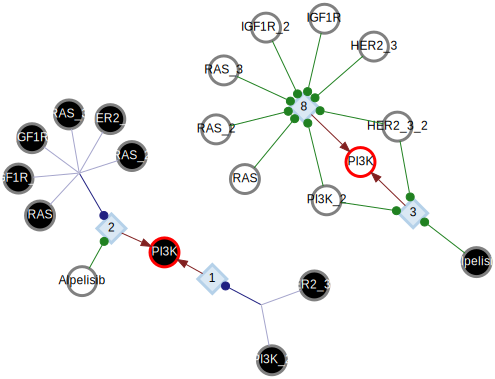

Inputs: ['Alpelisib', 'HER2_3_2', 'PI3K']
CM: PI3K_2


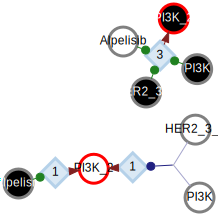

Inputs: ['PTEN']
CM: PTEN


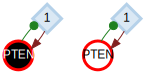

Inputs: ['PI3K', 'PI3K_2', 'PTEN', 'PIP3_2']
CM: PIP3


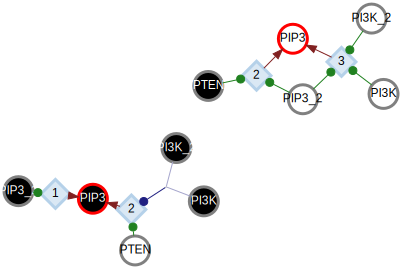

Inputs: ['PI3K_2', 'PTEN', 'PIP3']
CM: PIP3_2


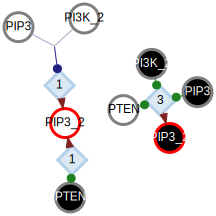

Inputs: ['PIP3', 'PIP3_2']
CM: PDK1_pm


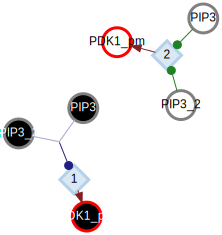

Inputs: ['Everolimus', 'PIP3', 'PIP3_2']
CM: mTORC2_pm


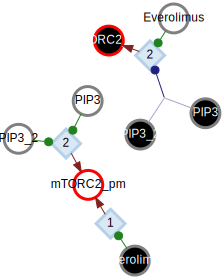

Inputs: ['Ipatasertib', 'PIP3', 'PIP3_2', 'PDK1_pm', 'mTORC2_pm']
CM: AKT


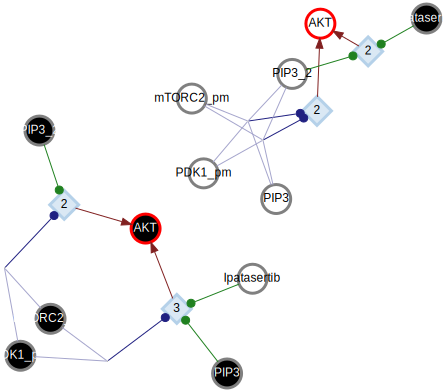

Inputs: ['FOXO3', 'MYC', 'MYC_2']
CM: p21_p27_T


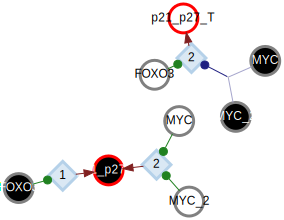

Inputs: ['PIM', 'AKT', 'p21_p27_T']
CM: p21_p27


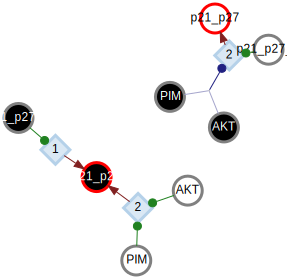

Inputs: ['E2F', 'E2F_2', 'E2F_3']
CM: cycE_CDK2_T


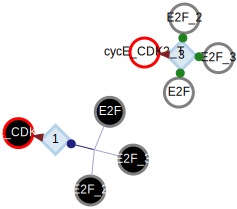

Inputs: ['p21_p27', 'cycE_CDK2_T']
CM: cycE_CDK2


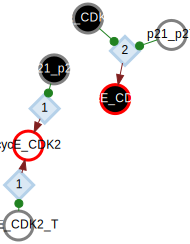

Inputs: ['AKT']
CM: KMT2D


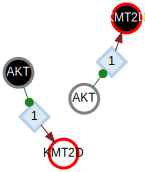

Inputs: ['SGK1', 'MAPK_2', 'AKT']
CM: TSC


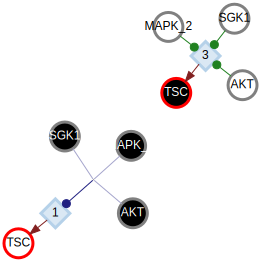

Inputs: ['PIM', 'AKT']
CM: PRAS40


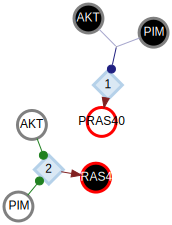

Inputs: ['Everolimus', 'TSC', 'PRAS40']
CM: mTORC1


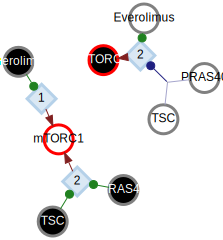

Inputs: ['SGK1', 'PIM', 'AKT', 'FOXO3_Ub']
CM: FOXO3


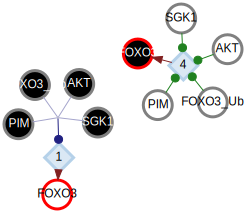

Inputs: ['MAPK_2']
CM: FOXO3_Ub


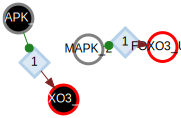

Inputs: ['BIM_T']
CM: BIM_T


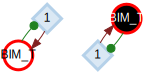

Inputs: ['BCL2_T']
CM: BCL2_T


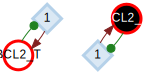

Inputs: ['MAPK_2', 'FOXO3', 'BIM_T']
CM: BIM


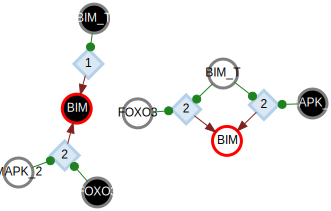

Inputs: ['PIM', 'MAPK', 'MAPK_2', 'AKT']
CM: BAD


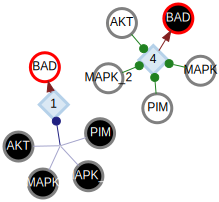

Inputs: ['Translation']
CM: MCL1


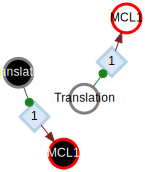

Inputs: ['mTORC1']
CM: EIF4F


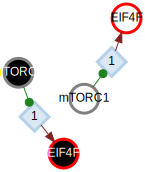

Inputs: ['mTORC1']
CM: S6K


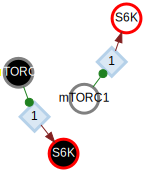

Inputs: ['EIF4F', 'S6K']
CM: Translation


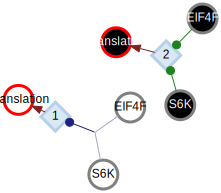

Inputs: ['ER']
CM: ER


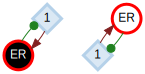

Inputs: ['Fulvestrant', 'FOXO3', 'ER', 'ESR1_2']
CM: ESR1


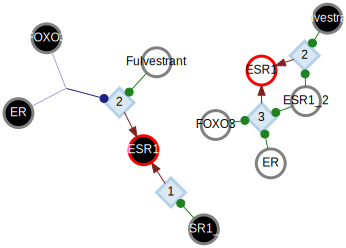

Inputs: ['Fulvestrant', 'FOXO3', 'ER', 'ESR1']
CM: ESR1_2


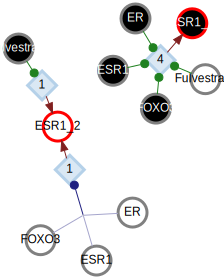

Inputs: ['FOXO3']
CM: FOXA1


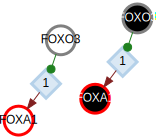

Inputs: ['PBX1']
CM: PBX1


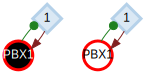

Inputs: ['ER', 'ESR1', 'ESR1_2', 'ER_transcription_2']
CM: ER_transcription


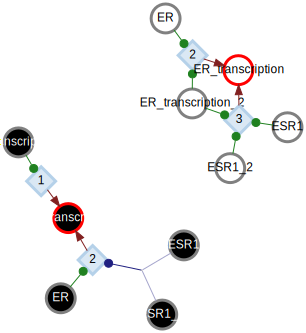

Inputs: ['KMT2D', 'ER', 'ESR1_2', 'FOXA1', 'PBX1', 'ER_transcription']
CM: ER_transcription_2


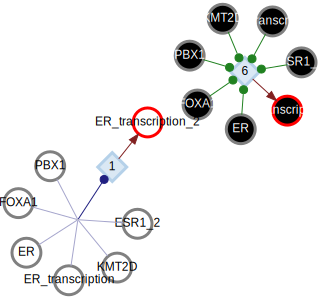

Inputs: ['ER_transcription', 'MYC_2']
CM: MYC


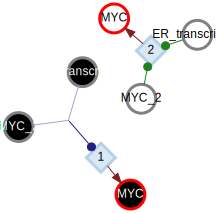

Inputs: ['ER_transcription_2', 'MYC']
CM: MYC_2


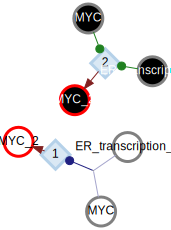

Inputs: ['MYC', 'cyclinD_2']
CM: cyclinD


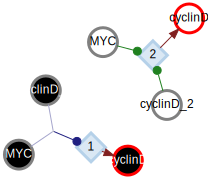

Inputs: ['MYC_2', 'cyclinD']
CM: cyclinD_2


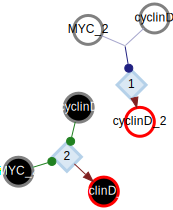

Inputs: ['BCL2_T', 'ER_transcription_2']
CM: BCL2


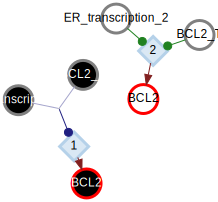

Inputs: ['Palbociclib']
CM: CDK46


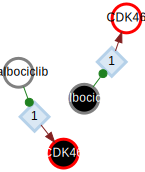

Inputs: ['cyclinD', 'cyclinD_2', 'CDK46', 'cycD_CDK46_2']
CM: cycD_CDK46


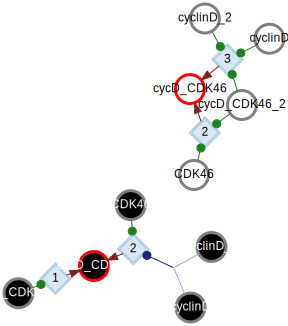

Inputs: ['cyclinD_2', 'CDK46', 'cycD_CDK46']
CM: cycD_CDK46_2


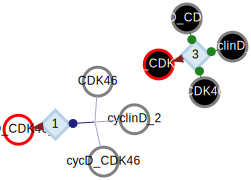

Inputs: ['cycE_CDK2', 'cycD_CDK46', 'cycD_CDK46_2', 'pRb_2', 'pRb_3']
CM: pRb


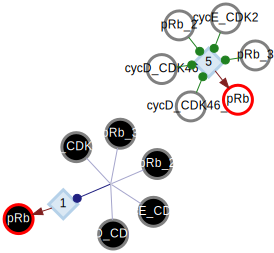

Inputs: ['cycE_CDK2', 'cycD_CDK46', 'cycD_CDK46_2', 'pRb', 'pRb_3']
CM: pRb_2


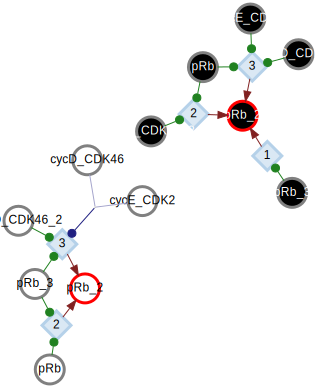

Inputs: ['cycE_CDK2', 'cycD_CDK46_2', 'pRb', 'pRb_2']
CM: pRb_3


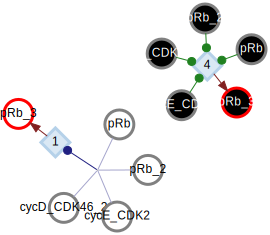

Inputs: ['pRb', 'E2F_2', 'E2F_3']
CM: E2F


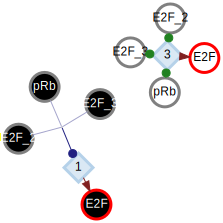

Inputs: ['pRb_2', 'E2F', 'E2F_3']
CM: E2F_2


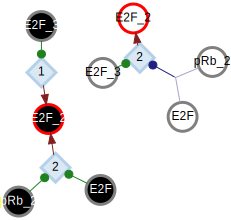

Inputs: ['pRb_2', 'pRb_3', 'E2F', 'E2F_2', 'E2F_3']
CM: E2F_3


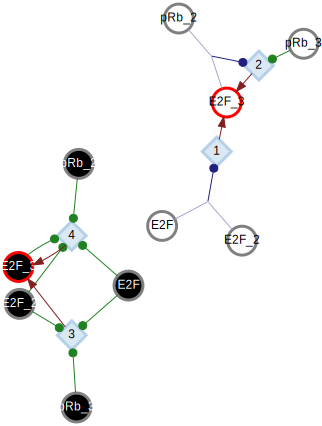

Inputs: ['Translation', 'E2F', 'E2F_2', 'E2F_3']
CM: Proliferation


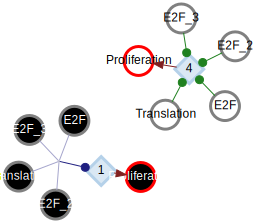

Inputs: ['Translation', 'E2F_2', 'E2F_3']
CM: Proliferation_2


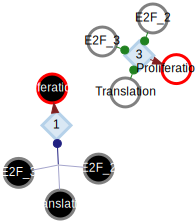

Inputs: ['Translation', 'E2F_2', 'E2F_3']
CM: Proliferation_3


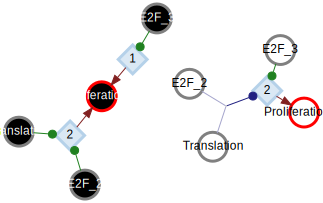

Inputs: ['Translation', 'E2F_3']
CM: Proliferation_4


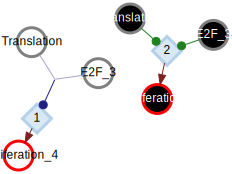

Inputs: ['BIM', 'BAD', 'MCL1', 'BCL2', 'Apoptosis']
CM: Apoptosis


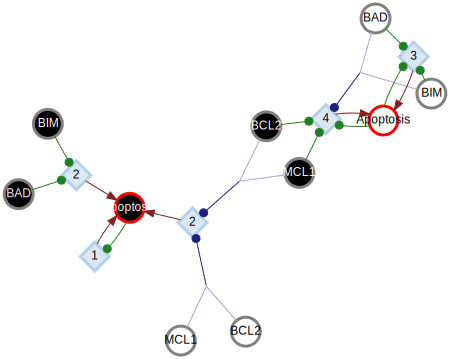

Inputs: ['BIM', 'BAD', 'MCL1', 'BCL2', 'Apoptosis_2']
CM: Apoptosis_2


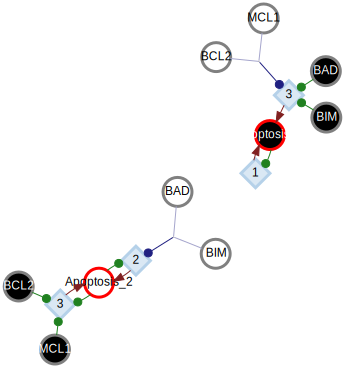

Inputs: ['BIM', 'BAD', 'MCL1', 'BCL2', 'Apoptosis_3']
CM: Apoptosis_3


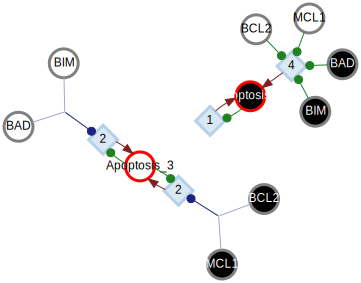

In [16]:
bound = 'upper'
for i,n in enumerate(N.nodes):
    display(HTML('<h2>'+n.name+'</h2>'))
    print 'Inputs:',n.inputs
    k = n.k
    k_r = n.input_redundancy(mode='node',bound=bound,norm=False)
    k_r_n = n.input_redundancy(mode='node',bound=bound,norm=True)
    k_e = n.effective_connectivity(mode='node', bound=bound, norm=False)
    k_s = n.input_symmetry(mode='node',bound=bound,norm=False)
    k_s_n = n.input_symmetry(mode='node',bound=bound,norm=True)
    
    dfS = pd.DataFrame([('k',k),('k_r',k_r),('k_e',k_e),('k_s',k_s),('k_r*',k_r_n),('k_s*',k_s_n)]).set_index(0).T
    #display(dfS)
    
    pi = n.schemata_look_up_table(type='pi',format='latex', ts_symbol_latex="\circ")
    ts = n.schemata_look_up_table(type='ts',format='latex', ts_symbol_latex="\circ")
    #display(Latex(pi))
    #display(Latex(ts))
    #multi_column_display([pi,ts],titles=['Prime Implicants','Two-Symbol Schemtas'],cols=4)

    # to make sure each SVG renders independently, add the "metadata={'isolated':True}
    CM = n.canalizing_map()
    gv = draw_canalizing_map_graphviz(CM)
    print CM
    display(SVG(gv.pipe(format='svg')),metadata={'isolated':True})

    # Export to .SVG
    filename = n.name
    filename = filename.replace(',','_')
    filename = filename.replace('/','_')
    gv._format = 'svg'
    efile = u'%s/../experiments/2017 - BioModels/%s/CM/%s-%s' % (os.getcwd(),foldername,i,filename)
    gv.render(efile, cleanup=True)
    subprocess.call("inkscape -z -d 150 '%s.svg' -e '%s.png'" % (efile,efile) , shell=True)

    #break

In [17]:
# Request the DCM to the Network
DCM = N.dynamics_canalization_map(output=None)
# Draws using the graphviz interface.
D = draw_dynamics_canalization_map_graphviz(DCM, overlap='true')
#display(D)

# Export to .SVG
D._format = 'svg'
efile = u'%s/../experiments/2017 - BioModels/%s/DCM/DCM' % (os.getcwd(), foldername)
D.render(efile, cleanup=True)
subprocess.call("inkscape -z -d 150 '%s.svg' -e '%s.png'" % (efile,efile) , shell=True)


1

In [18]:
def plot_schemata(nid, n):
    # Init values from BooleanNode
    k = n.k if n.k>=1 else 1
    inputs = n.inputs if not n.constant else [n.name]
    pi0s,pi1s = n._prime_implicants
    ts0s,ts1s = n._two_symbols
    # Count number of PI and TS
    n_pi = sum(len(pis) for pis in [pi0s,pi1s])
    n_ts = sum(len(tss) for tss in [ts0s,ts1s])
    # Schemata Cell Width and spacing
    cwidth = 60.
    cxspace = 0
    cyspace = 6
    border = 1
    sepcxspace = 21
    sepcyspace = 15
    dpi = 150.
    # Margins
    top, right, bottom, left, hs = 160, 25, 25, 60, 60
    # Axes Width & Height
    ax1width = ((k*(cwidth+cxspace))+sepcxspace+(cwidth))
    ax1height = (n_pi*(cwidth+cyspace)+sepcyspace-cyspace)
    ax2width = ((k*(cwidth+cxspace))+sepcxspace+(cwidth))
    ax2height = (n_ts*(cwidth+cyspace)+sepcyspace-cyspace)
    # Figure Width & Height
    fwidth = (left + ax1width + hs + ax2width + right)
    fheight = (bottom + max(ax1height,ax2height) + top)
    # Percentages for Axes location
    _ax1w = ((ax1width*100) / fwidth) / 100
    _ax2w = ((ax2width*100) / fwidth) / 100
    _ax1h = ((ax1height*100) / fheight) / 100
    _ax2h = ((ax2height*100) / fheight) / 100
    _bottom = ((bottom*100) / fheight) / 100
    _left = ((left*100) / fwidth) / 100
    _hs = ((hs*100) / fwidth) / 100
    # Init Figure
    fig = plt.figure(figsize=(fwidth/dpi,fheight/dpi), dpi=dpi)
    ax1 = fig.add_axes((_left,_bottom,_ax1w,_ax1h), aspect=1, label='PI')
    ax2 = fig.add_axes((_left+_ax1w+_hs,_bottom,_ax2w,_ax1h), aspect=1, label='TS')

    ### PI Plot ###

    yticks = []
    patches = []
    x,y = 0.,0.
    #
    for out,pis in zip([1,0],[pi1s,pi0s]):
        for pi in pis:
            x = 0.
            xticks = []
            for input in pi:
                if input == '0':
                    facecolor = 'white'
                    textcolor = 'black'
                elif input == '1':
                    facecolor = 'black'
                    textcolor = 'white'
                elif input == '2':
                    facecolor = '#cccccc'
                    textcolor = 'black'            
                text = '%s'%(input) if (input!='2') else '#'
                ax1.add_artist(Text(x+cwidth/2,y+cwidth/10*4, text=text, color=textcolor, va='center', ha='center',fontsize=14,family='serif'))
                r = Rectangle((x,y), width=cwidth, height=cwidth, facecolor=facecolor, edgecolor='black')
                patches.append(r)
                xticks.append(x+cwidth/2)
                x += cwidth + cxspace

            x += sepcxspace
            r = Rectangle((x,y), width=cwidth, height=cwidth, facecolor='black' if (out==1) else 'white', edgecolor='black')
            ax1.add_artist(Text(x-(sepcxspace/2)-(cxspace/2),y+cwidth/10*4, text=':', color='black', va='center', ha='center',fontsize=14,weight='bold',family='serif'))
            ax1.add_artist(Text(x+(cwidth/2),y+cwidth/10*4, text=out, color='white' if (out==1) else 'black', va='center', ha='center',fontsize=14,family='serif'))
            patches.append(r)
            xticks.append(x+cwidth/2)
            yticks.append(y+cwidth/2)
            y += cwidth + cyspace
        y += sepcyspace

    ax1.add_collection(PatchCollection(patches,match_original=True))
    #
    ax1.set_yticks(yticks)
    ax1.set_yticklabels([r"$f^{'}_{%d}$"%(i+1) for i in range(n_pi)[::-1]], fontsize=14)
    ax1.set_xticks(xticks)
    ax1.set_xticklabels(inputs + ['%s'%(n.name)], rotation=90, fontsize=14)
    #
    ax1.xaxis.tick_top()
    # Remove Tick
    ax1.tick_params(which='major',pad=7)
    for tic in ax1.xaxis.get_major_ticks():
        tic.tick1On = tic.tick2On = False
    for tic in ax1.yaxis.get_major_ticks():
        tic.tick1On = tic.tick2On = False
    # Remove Border
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.spines['bottom'].set_visible(False)
    ax1.spines['left'].set_visible(False)
    # Limits
    ax1.set_xlim(-border,ax1width+border)
    ax1.set_ylim(-border,ax1height+border)
    #ax1.invert_yaxis() 

    ## TS ##

    t = 0
    x,y = 0.,0.
    yticks = []
    boxes,symbols = [], []
    #
    tssymbols = [
        Circle((None,None), radius=5, facecolor='white', edgecolor='black'),
        RegularPolygon((None,None),numVertices=3, radius=5, orientation=0, facecolor='white', edgecolor='black'),
    ]
    #
    for out,tss in zip([1,0],[ts1s,ts0s]):
        for ts,pss,sss in tss:
            x = 0.
            xticks = []
            for i,input in enumerate(ts):
                if input == '0':
                    facecolor = 'white'
                    textcolor = 'black'
                elif input == '1':
                    facecolor = 'black'
                    textcolor = 'white'
                elif input == '2':
                    facecolor = '#cccccc'
                    textcolor = 'black'

                if len(pss):
                    # TODO: If there are several symbols in the same input position, place them side-by-side
                    iinpss = [j for j,ps in enumerate(pss) if i in ps]
                    xpos = np.linspace(x,x+cwidth, len(iinpss)+2)
                    for z,j in enumerate(iinpss,start=1):
                        s = copy(tssymbols[j])
                        s.xy = (xpos[z],y+cwidth*0.8)
                        s.center = xpos[z],y+cwidth*0.8 # A hack for circles only
                        s.set_edgecolor('#a6a6a6' if (input=='1') else 'black')
                        symbols.append(s)
                        ax2.add_patch(s)

                text = '%s'%(input) if (input!='2') else '#'
                ax2.add_artist(Text(x+cwidth/2,y+cwidth/10*4, text=text, color=textcolor, va='center', ha='center',fontsize=14,family='serif'))
                r = Rectangle((x,y), width=cwidth, height=cwidth, facecolor=facecolor, edgecolor='#4c4c4c',zorder=2)
                boxes.append(r)
                xticks.append(x+cwidth/2)
                x += cwidth + cxspace

            x += sepcxspace
            r = Rectangle((x,y), width=cwidth, height=cwidth, facecolor='black' if (out==1) else 'white', edgecolor='#4c4c4c')
            ax2.add_artist(Text(x-(sepcxspace/2)-(cxspace/2),y+cwidth/2, text=':', color='black', va='center', ha='center',fontsize=14,weight='bold',family='serif'))
            ax2.add_artist(Text(x+(cwidth/2),y+cwidth/10*4, text=out, color='white' if (out==1) else 'black', va='center', ha='center',fontsize=14,family='serif'))
            boxes.append(r)
            xticks.append(x+cwidth/2)
            yticks.append(y+cwidth/2)
            y += cwidth + cyspace
            t += 1
        y += sepcyspace

    if len(boxes):
        ax2.add_collection(PatchCollection(boxes,match_original=True))
    if len(symbols):
        ax2.add_collection(PatchCollection(symbols,match_original=True))
    #
    ax2.set_yticks(yticks)
    ax2.set_yticklabels([r"$f^{''}_{%d}$"%(i+1) for i in range(n_ts)[::-1]], fontsize=14)
    ax2.set_xticks(xticks)
    ax2.set_xticklabels(inputs + ['%s'%(n.name)], rotation=90, fontsize=14)
    #
    ax2.xaxis.tick_top()
    # Remove Tick
    ax2.tick_params(which='major',pad=7)
    for tic in ax2.xaxis.get_major_ticks():
        tic.tick1On = tic.tick2On = False
    for tic in ax2.yaxis.get_major_ticks():
        tic.tick1On = tic.tick2On = False
    # Remove Border
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.spines['bottom'].set_visible(False)
    ax2.spines['left'].set_visible(False)
    # Limits
    ax2.set_xlim(-border,ax2width+border)
    ax2.set_ylim(-border,ax2height+border)

    # FileName
    filename = n.name.replace('/','_')
    filename = filename.replace(',','_')
    ### SAVE to FILE ###
    #plt.savefig('%s/../experiments/2017 - BioModels/%s/schematas/%s-%s' % (os.getcwd(), foldername, nid, filename), dpi=dpi)
    #plt.close()

Plotting: 0 - IGF1R_T
Plotting: 1 - IGF1R
Plotting: 2 - IGF1R_2
Plotting: 3 - Fulvestrant
Plotting: 4 - Alpelisib
Plotting: 5 - Everolimus
Plotting: 6 - Trametinib
Plotting: 7 - Ipatasertib
Plotting: 8 - Palbociclib
Plotting: 9 - Neratinib
Plotting: 10 - HER2
Plotting: 11 - HER3_T
Plotting: 12 - HER3
Plotting: 13 - HER3_2
Plotting: 14 - PDK1
Plotting: 15 - mTORC2
Plotting: 16 - SGK1_T
Plotting: 17 - SGK1
Plotting: 18 - PIM
Plotting: 19 - HER2_3
Plotting: 20 - HER2_3_2
Plotting: 21 - RAS
Plotting: 22 - RAS_2
Plotting: 23 - RAS_3
Plotting: 24 - MAPK
Plotting: 25 - MAPK_2
Plotting: 26 - PI3K
Plotting: 27 - PI3K_2
Plotting: 28 - PTEN
Plotting: 29 - PIP3
Plotting: 30 - PIP3_2
Plotting: 31 - PDK1_pm
Plotting: 32 - mTORC2_pm
Plotting: 33 - AKT
Plotting: 34 - p21_p27_T
Plotting: 35 - p21_p27
Plotting: 36 - cycE_CDK2_T
Plotting: 37 - cycE_CDK2
Plotting: 38 - KMT2D
Plotting: 39 - TSC
Plotting: 40 - PRAS40
Plotting: 41 - mTORC1
Plotting: 42 - FOXO3
Plotting: 43 - FOXO3_Ub
Plotting: 44 - BIM_T
Plo

C:\Users\tjparmer\AppData\Roaming\Python\Python27\site-packages\matplotlib\pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


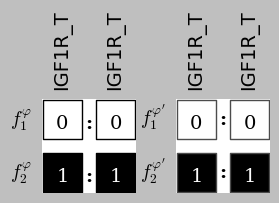

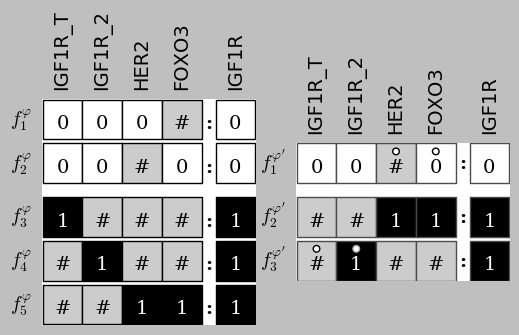

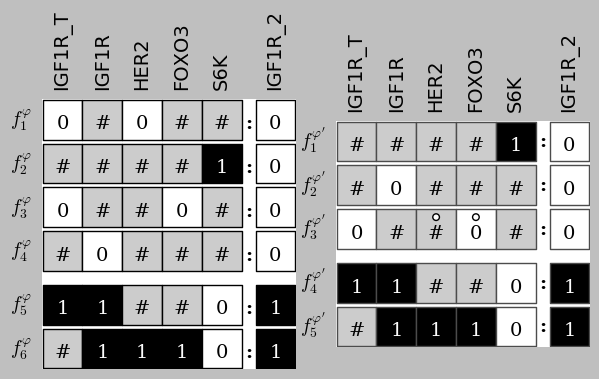

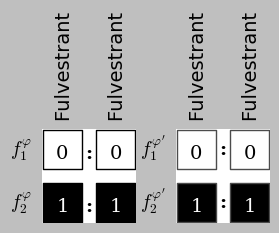

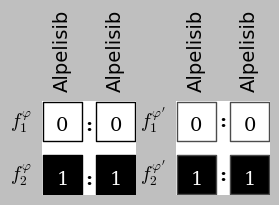

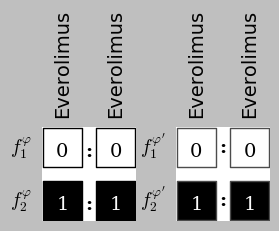

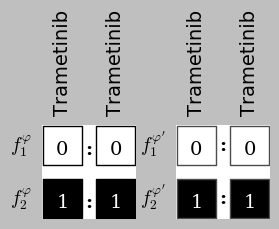

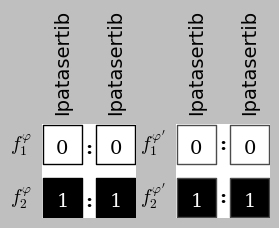

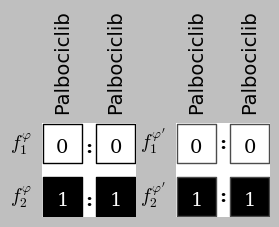

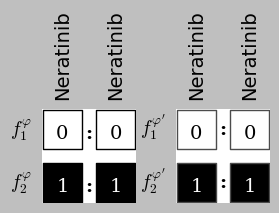

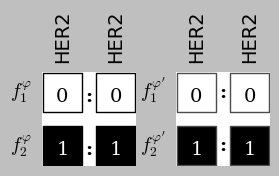

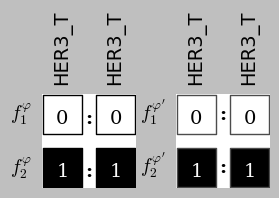

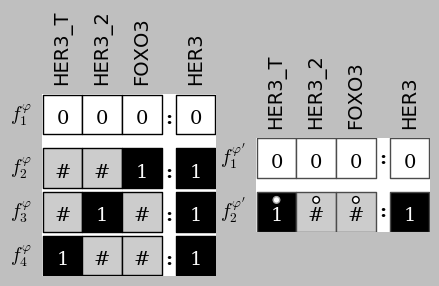

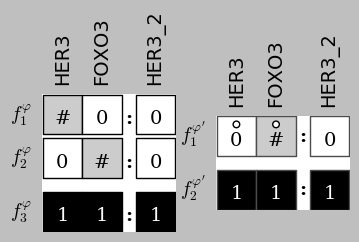

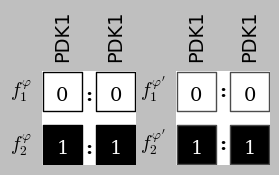

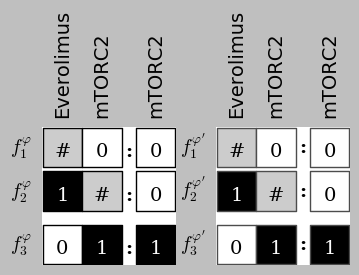

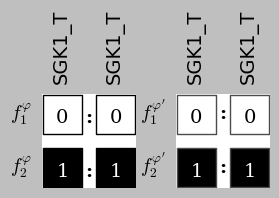

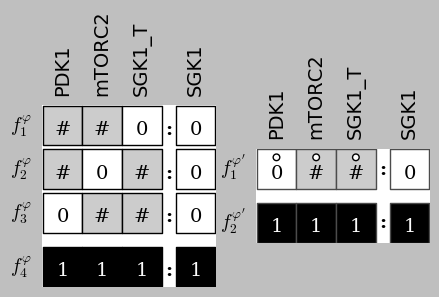

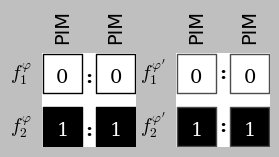

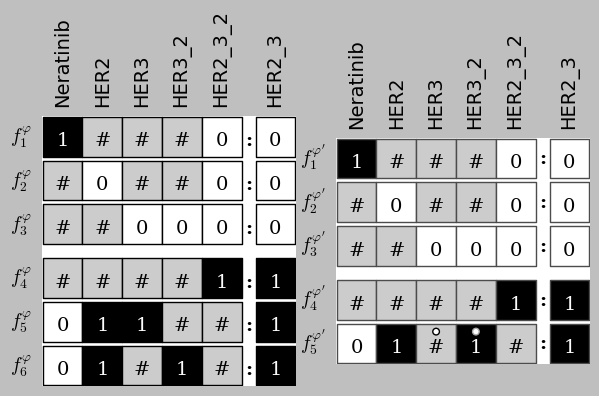

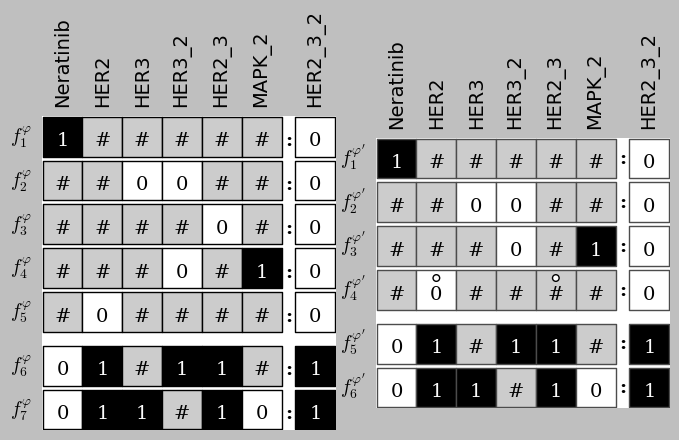

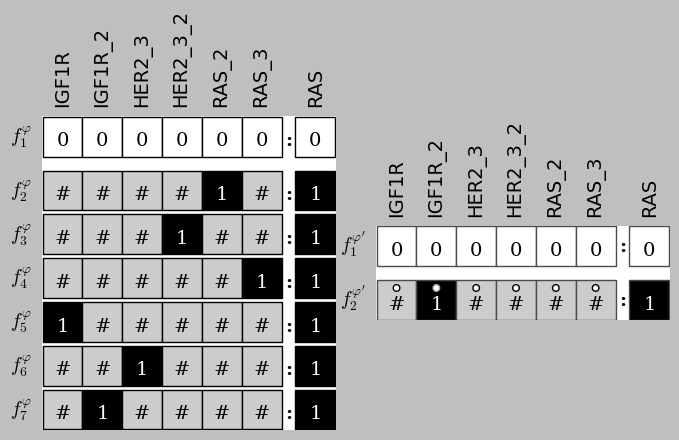

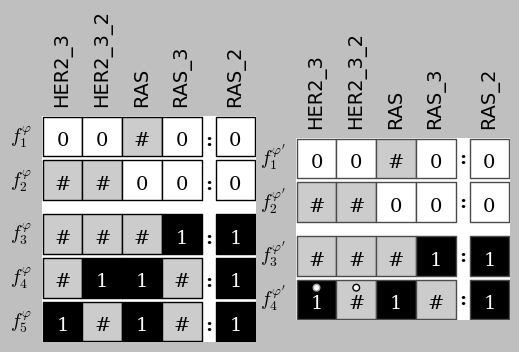

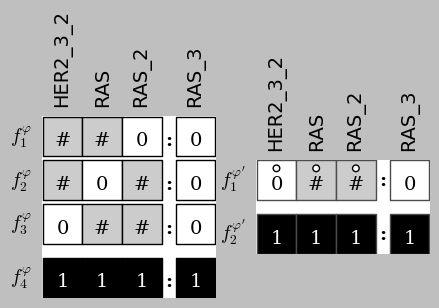

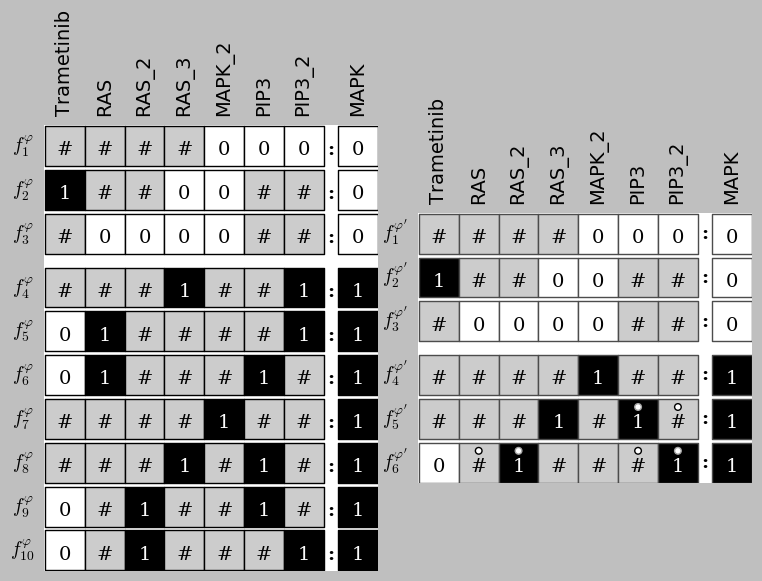

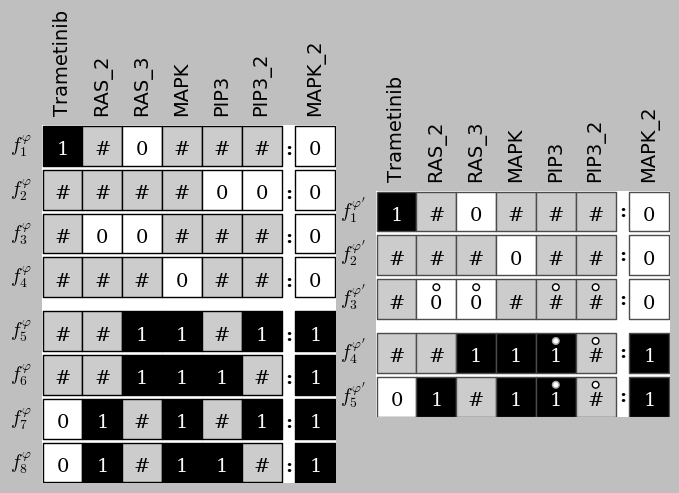

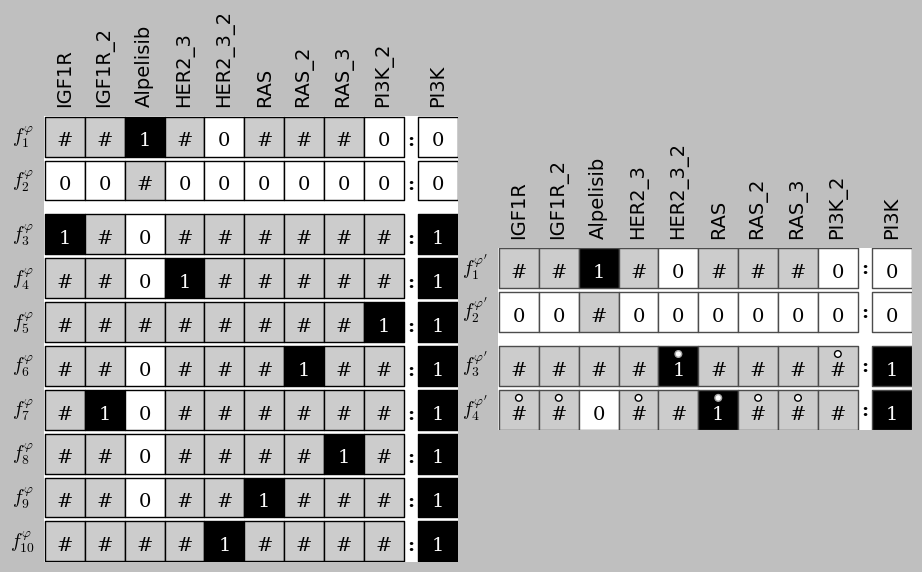

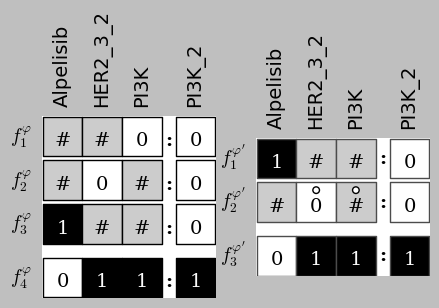

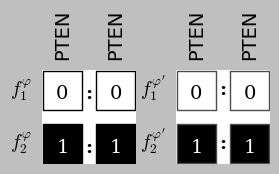

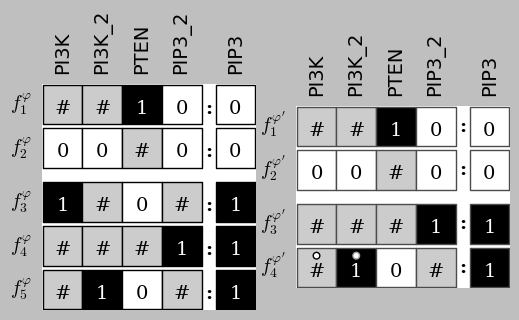

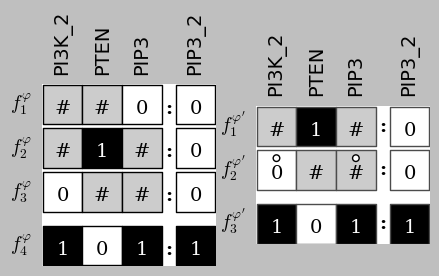

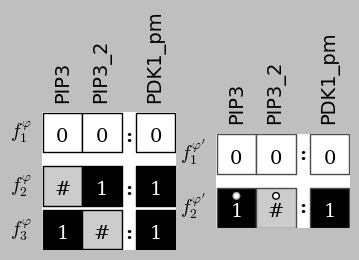

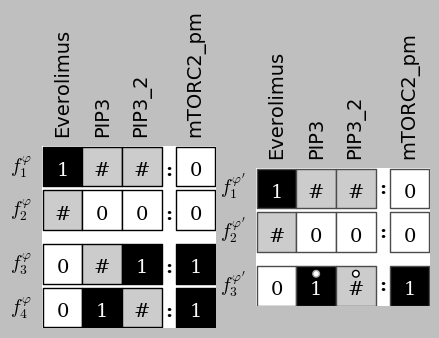

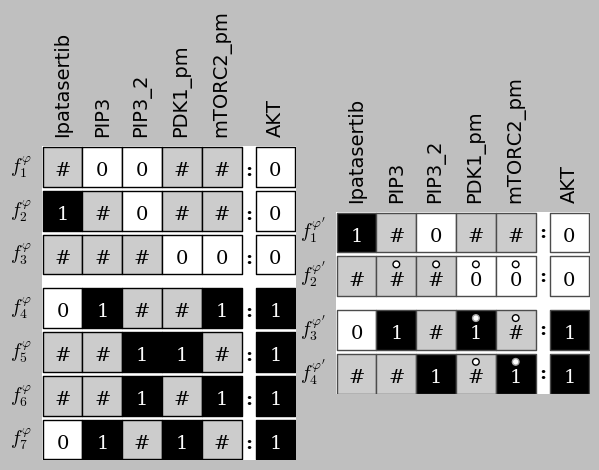

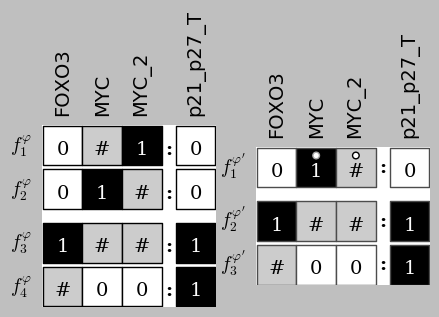

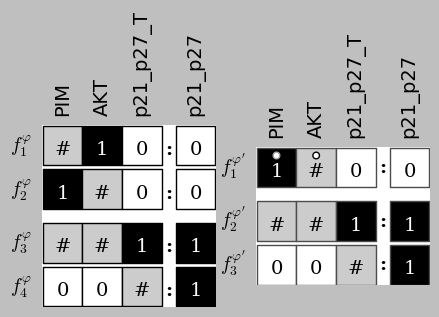

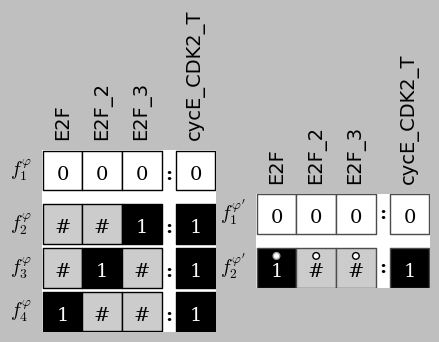

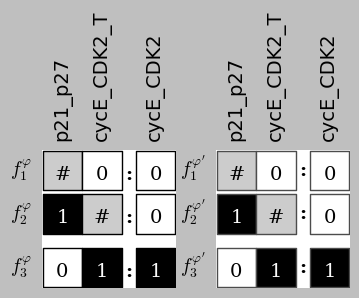

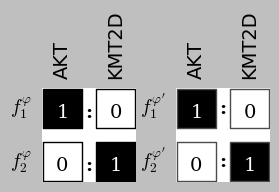

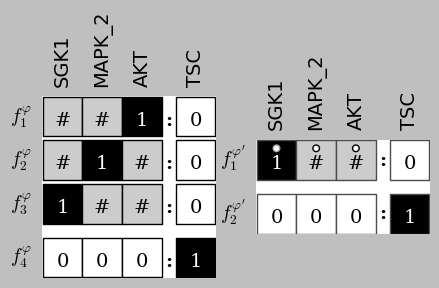

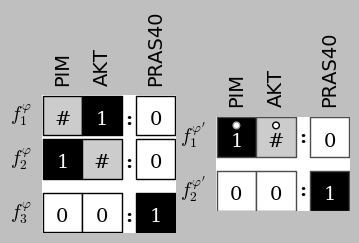

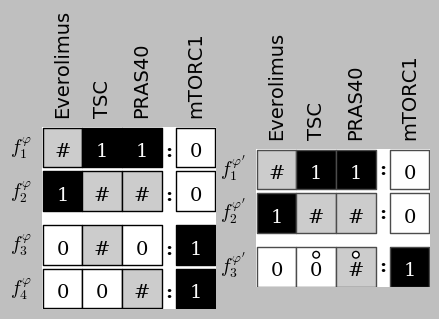

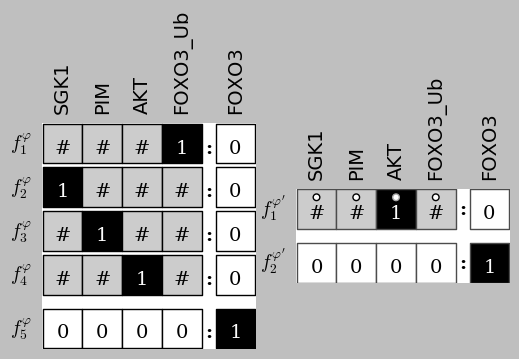

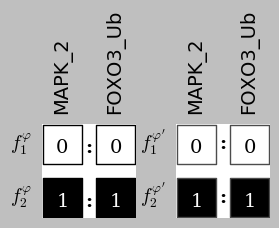

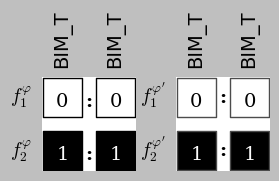

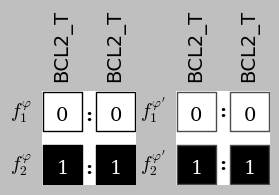

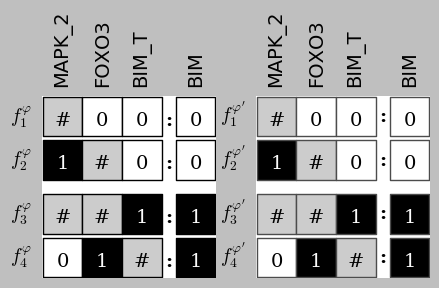

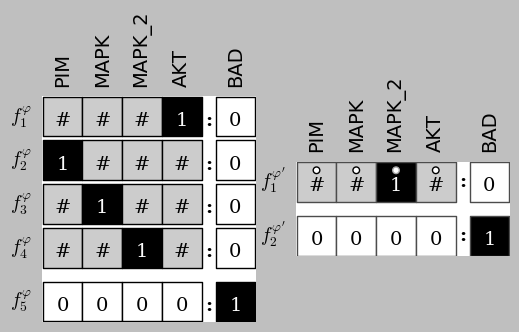

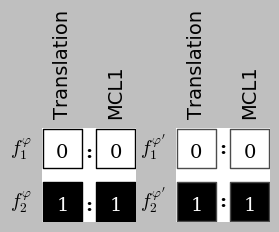

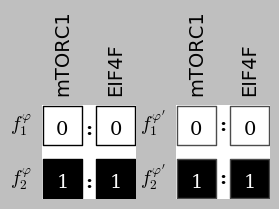

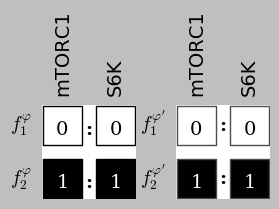

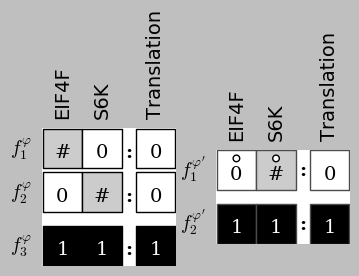

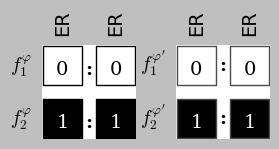

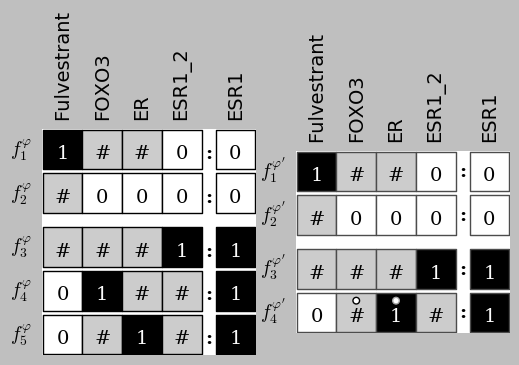

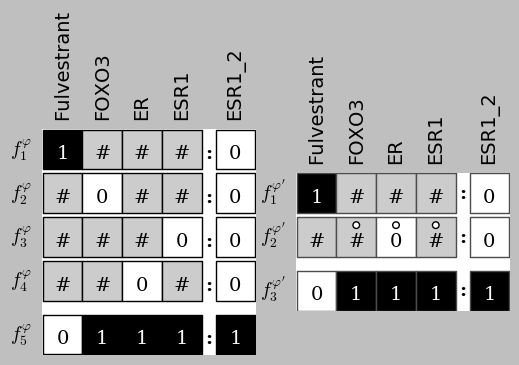

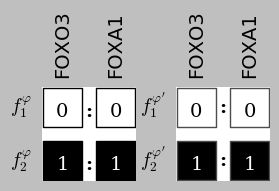

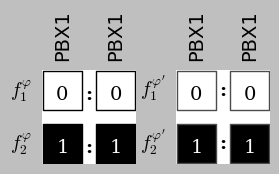

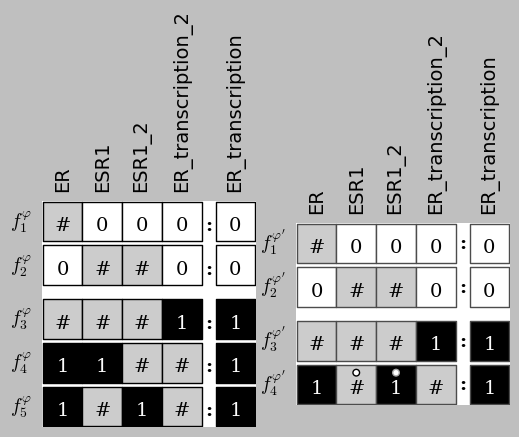

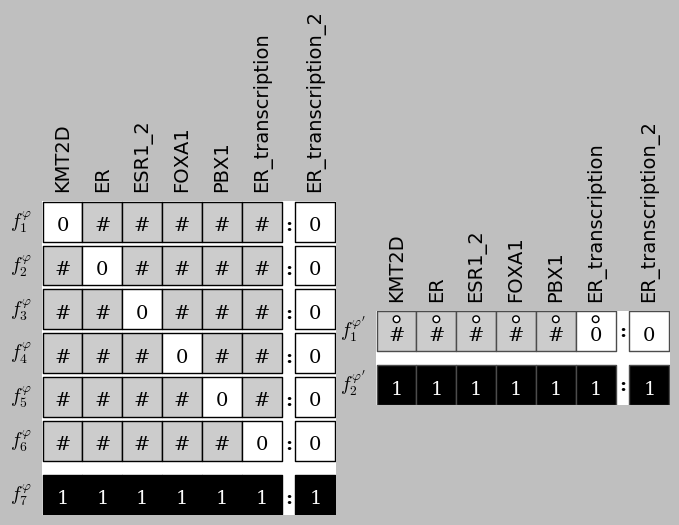

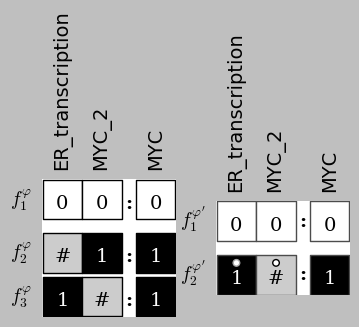

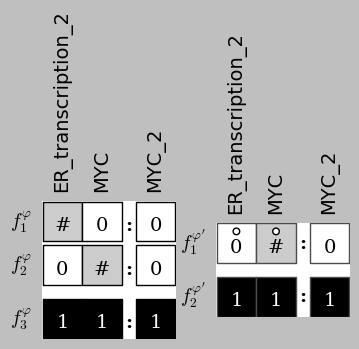

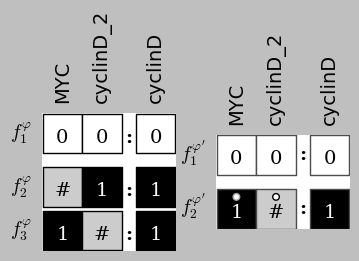

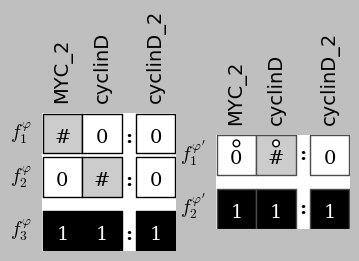

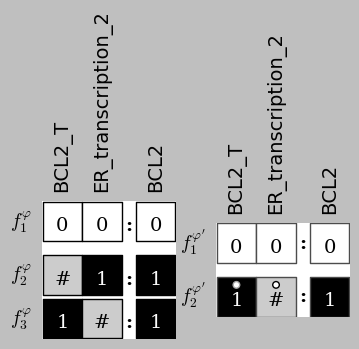

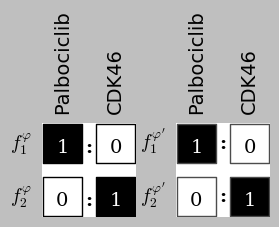

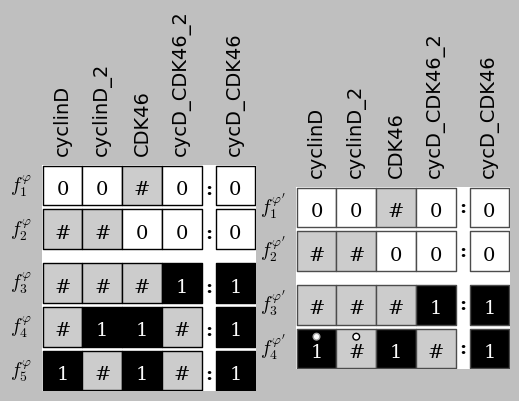

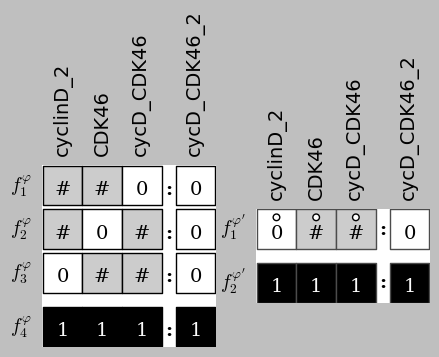

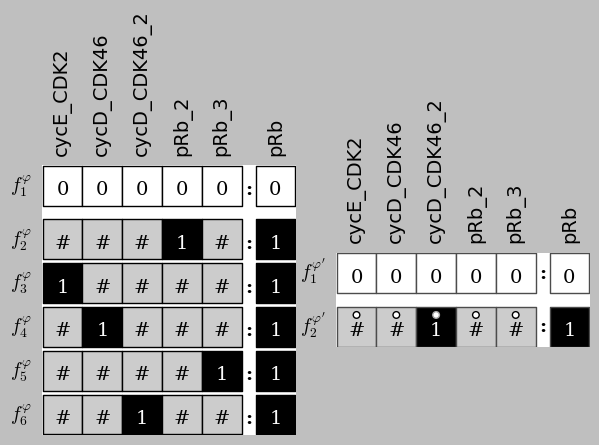

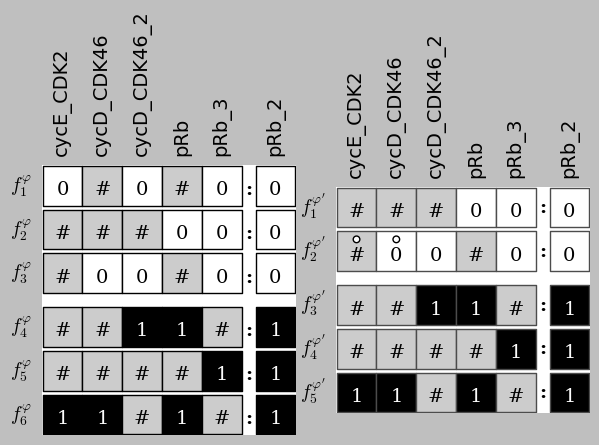

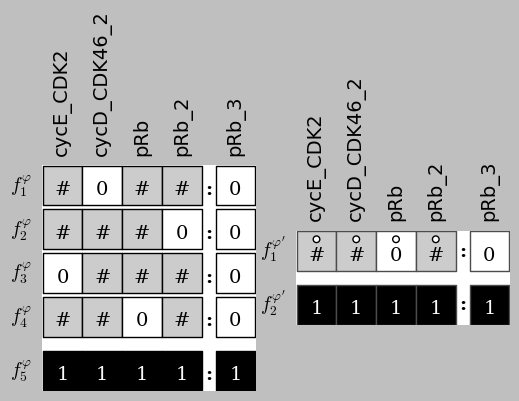

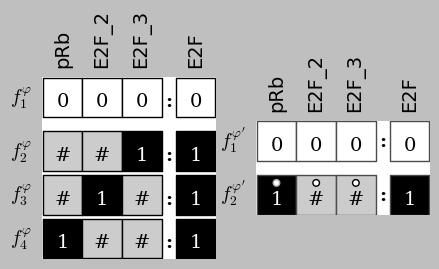

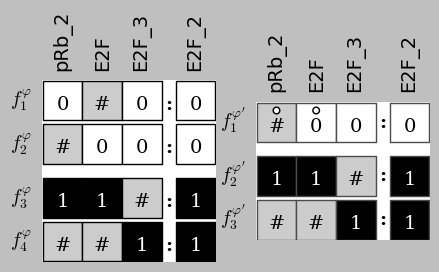

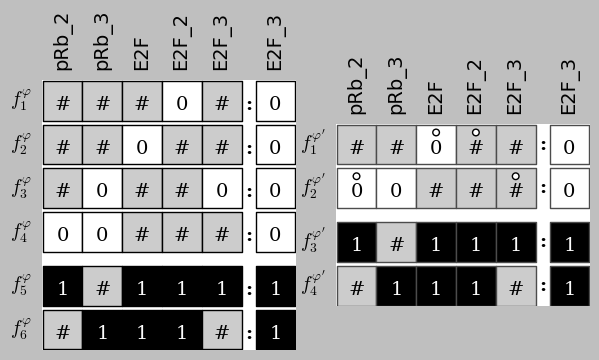

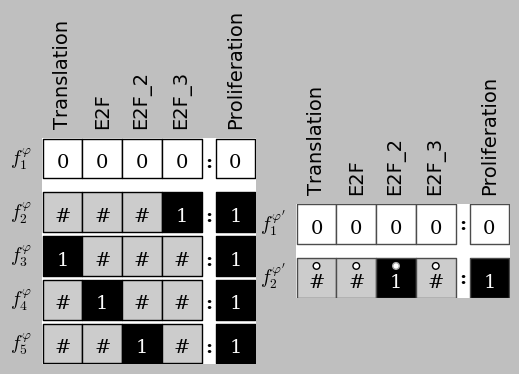

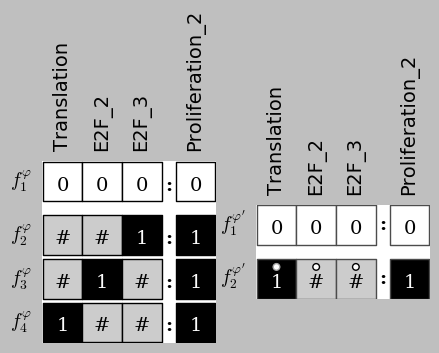

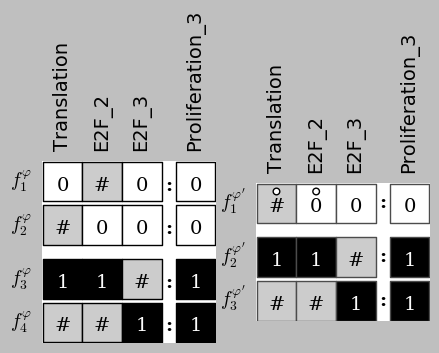

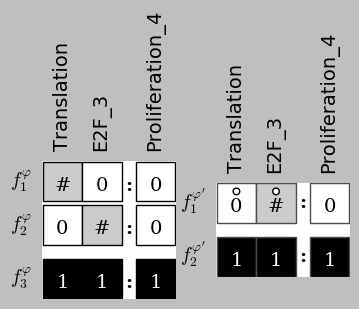

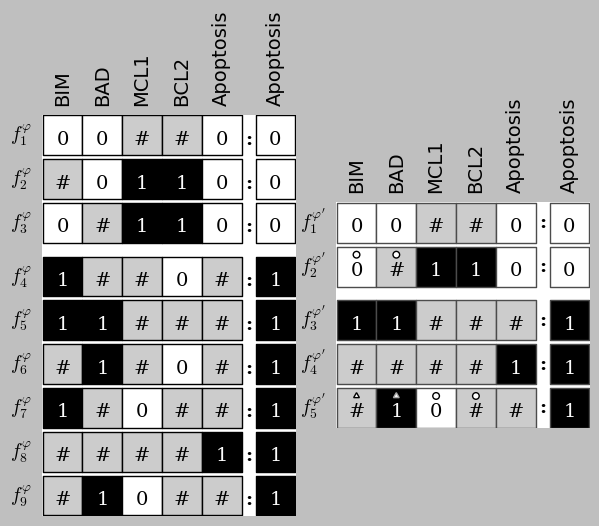

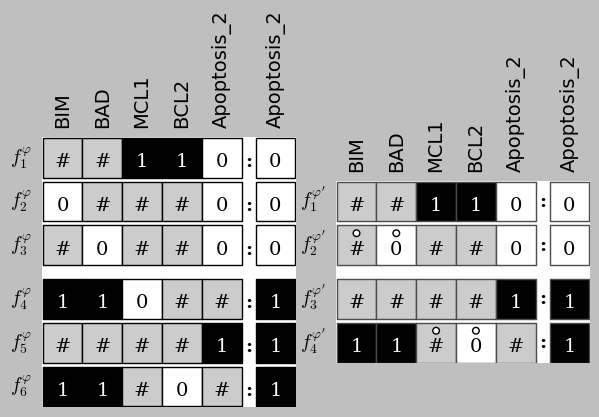

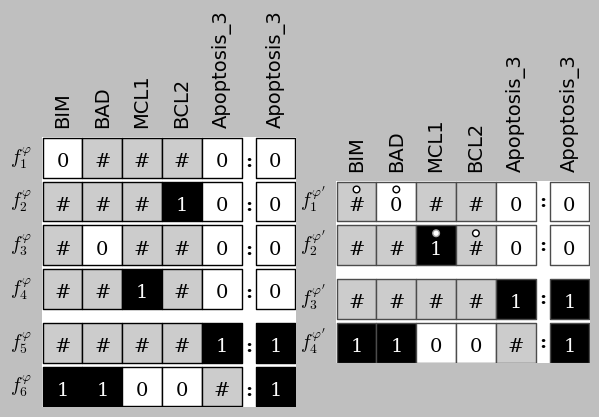

In [19]:
for nid,n in enumerate(N.nodes):
    print 'Plotting: %s - %s' % (nid,n.name)
    # Compute Prime Implicants & Two-Symbol schematas
    n._check_compute_canalization_variables(prime_implicants=True)
    n._check_compute_canalization_variables(two_symbols=True)
    # Plot
    plot_schemata(nid,n)